## Name: Itunuoluwa Abidoye 202136265

## Course Name: Fundamentals of Data Science

## Course Code: 771766_A23_T1

## Question: 
## (a) What should be built on an unoccupied plot of land that the local government wishes to
develop? Your choices are:
(i) High-density housing. This should be built if the population is significantly expanding.
(ii) Low-density housing. This should be built if the population is “affluent” and there is
demand for large family housing.
(iii) Train station. There are potentially a lot of commuters in the town and building a train
station could take pressure off the roads. But how will you identify commuters?
(iv) Religious building. There is already one place of worship for Catholics in the town. Is
there demand for a second Church (if so, which denomination?), or for a different religious building?
(v) Emergency medical building. Not a full hospital, but a minor injuries centre. This should
be built if there are many injuries or future pregnancies likely in the population.
(vi) Something else?
Whichever you choose, you must justify it from the data provided to you and argue it is a priority
against other choices.

## (b) Which one of the following options should be invested in?
(i) Employment and training. If there is evidence for a lot of unemployment, we should re-
train people for new skills.
(ii) Old age care. If there is evidence for increasing numbers of retired people in future years,
the town will need to allocate more funding for end of life care.
(iii) Increase spending for schooling. If there is evidence of a growing population of school-
aged children (new births, or families moving in to the town), then schooling spend should increase.
(iv) General infrastructure. If the town is expanding, then services (waste collection; road
maintenance, etc.) will require more investment.

In [1]:
# my error-handling and my dataset loading 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

csv_path = "./census13.csv"

try:
    df = pd.read_csv(csv_path) # using Pandas to read in my file 
    #census13_df = pd.read_csv(csv_path) # using Pandas to read in my file 
    df.info()
except FileNotFoundError as not_found: # File not found error 
    print(f"The file at path '{csv_path}' could not be found.")
except IOError as opening_error:
    print(f"An error occurred while trying to open the file: {opening_error}")
except Exception as exception:
    print(f"An unexpected error occurred: {exception}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   8878 non-null   int64  
 1   Street                         8878 non-null   object 
 2   First Name                     8878 non-null   object 
 3   Surname                        8878 non-null   object 
 4   Age                            8878 non-null   float64
 5   Relationship to Head of House  8878 non-null   object 
 6   Marital Status                 6911 non-null   object 
 7   Gender                         8878 non-null   object 
 8   Occupation                     8878 non-null   object 
 9   Infirmity                      8878 non-null   object 
 10  Religion                       6857 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 763.1+ KB


In [2]:
#df.head()

In [3]:
df.isna().sum() # investigating the colum headers

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1967
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2021
dtype: int64

[Text(0.5, 1.0, 'Census Data Null Values Heatmap')]

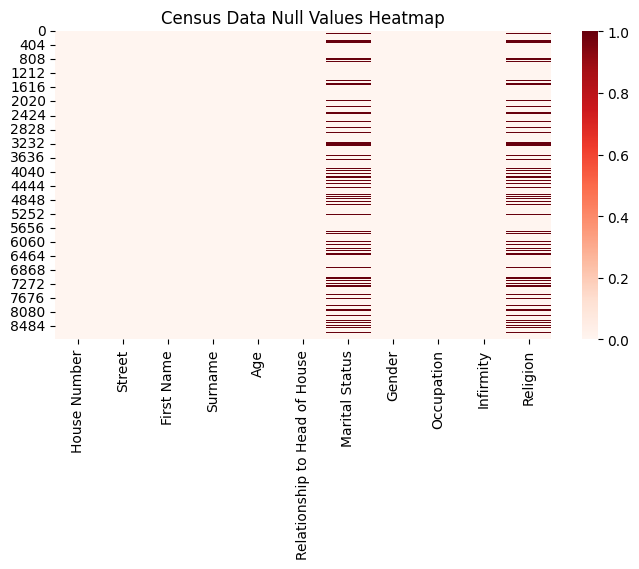

In [4]:
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull(),cmap='Reds').set(title="Census Data Null Values Heatmap")

In [5]:
df.duplicated().sum()  # Check for duplicate rows

0

In [6]:
df.describe(include="all")

House Number           Street First Name Surname          Age  \
count    8878.000000             8878       8878    8878  8878.000000   
unique           NaN              105        364     635          NaN   
top              NaN  Castorshy Drive       Kate   Smith          NaN   
freq             NaN              608         40     244          NaN   
mean       40.403244              NaN        NaN     NaN    37.104561   
std        46.147161              NaN        NaN     NaN    21.961020   
min         1.000000              NaN        NaN     NaN     0.000000   
25%        10.000000              NaN        NaN     NaN    19.000000   
50%        23.000000              NaN        NaN     NaN    36.000000   
75%        49.000000              NaN        NaN     NaN    53.000000   
max       236.000000              NaN        NaN     NaN   105.000000   

       Relationship to Head of House Marital Status  Gender Occupation  \
count                           8878           6911    8878       8878   
unique                            21              5       3       1126   
top                             Head         Single  Female    Student   
freq                            3382           3095    4644       1577   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

       Infirmity Religion  
count       8878     6857  
unique         8       12  
top         None     None  
freq        8805     2979  
mean         NaN      NaN  
std          NaN      NaN  
min          NaN      NaN  
25%          NaN      NaN  
50%          NaN      NaN  
75%          NaN      NaN  
max          NaN      NaN

## Datacleaning 

In [7]:
#check for empty colunm entry
def emptyColunms(colunm_dataset):
    empty_column = colunm_dataset.isnull().sum()
    #empty_column1 = df[colunm_name].isna().sum()
    return empty_column

#check for unique entry
def uniqueEntries(colunm_dataset):
    unique_entries = colunm_dataset.unique()
    return unique_entries

#check for possible empty string entry
def spaceEntries(colunm_dataset):
    space_entries = df[colunm_dataset == " "]
    return space_entries

#check for unique entry counts
def countEntries(colunm_dataset):
    count_entries = colunm_dataset.value_counts()
    return count_entries



## Investigating House Number Column

In [8]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
df['House Number'].isnull().sum()

0

In [10]:
df[df['House Number'] ==" "] # possible empty entry

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [11]:
df['House Number'].dtype

dtype('int64')

## Investigating Street Column

In [12]:
df['Street'].unique()

array(['Garner Fork', 'Brightloop Lane', 'Beech Lake', 'Todd Row',
       'Goodluck Avenue', 'Apricotbox Avenue', 'Baker Branch',
       'Dublin Points', 'Dundee Crescent', 'Mary Center', 'Parker Avenue',
       'Zebratraps Avenue', 'Myers Corners', 'Brooks Ridges',
       'Iris Vista', 'White Ramp', 'Foster Cove', 'Tamarisk Road',
       'Coconut Landing', 'Moore Spur', 'Calendar Coves', 'Spider Center',
       'Gray Brook', 'Smith Crescent', 'Glorious Parkway', 'Kelly Lane',
       'Waterloo Ford', 'Zebra Lane', 'Clark Crescent', 'Vaughan Light',
       'Open Loop', 'Earl Avenue', 'Whitehead Squares', 'Castorshy Drive',
       'Marshall Inlet', 'Houghton Circle', 'Gwyneddbind Street',
       'Station Road', 'Patterson Knolls', 'Peel Cliff',
       'Butler Extensions', 'Lawrence Canyon', 'Bumblebee Lane',
       'Cardiff Lane', 'Rhubarb Lane', 'Swansea Stream',
       'Armstrong Street', 'Wheeler Crescent', 'Holland Unions',
       'Brown Road', 'Bright Avenue', 'Rhubarb Ports', 'Gree

In [13]:
df['Street'].isnull().any()

False

In [14]:
df[df['Street'] ==" "] # possible empty entry

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

## Investigating Age Column

In [15]:
df['Age']

0       52.0
1       53.0
2       24.0
3       34.0
4       36.0
        ... 
8873    38.0
8874     2.0
8875    39.0
8876    63.0
8877    51.0
Name: Age, Length: 8878, dtype: float64

In [16]:
uniqueEntries(df['Age'])

array([ 52.        ,  53.        ,  24.        ,  34.        ,
        36.        ,  71.        ,  28.        ,  30.        ,
        82.        ,  48.        ,  51.        ,  16.        ,
        45.        ,  50.        ,  25.        ,  70.        ,
        75.        ,  66.        ,  35.        ,  33.        ,
        23.        ,  74.        ,  60.        ,  62.        ,
        38.        ,  69.        ,  21.        ,  46.        ,
        15.        ,  54.        ,  73.        ,  26.        ,
        44.        ,  12.        ,  61.        ,  19.        ,
        18.        ,  58.        ,   4.        ,  43.        ,
        47.        ,  10.        ,   5.        ,   1.        ,
        41.        ,  27.        ,  72.        ,  78.        ,
        77.        ,  37.        ,  14.        ,   9.        ,
        40.        ,   6.        ,  56.        ,   8.        ,
        68.        ,  67.        ,  63.        ,  64.        ,
        83.        ,  29.        ,  32.        ,  22.  

In [17]:
emptyColunms(df['Age'])

0

In [18]:
spaceEntries(df['Age']) # possible empty entry

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

## Converting Age to the Appropriate Data type Integer

In [19]:
#Converting Age to appropriate data type
df['Age'].dtype # checking the datatype
df['Age'] = df['Age'].astype(np.int64) # converting to integer data type

In [20]:
df.info() #confirm the Age datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8878 non-null   int64 
 1   Street                         8878 non-null   object
 2   First Name                     8878 non-null   object
 3   Surname                        8878 non-null   object
 4   Age                            8878 non-null   int64 
 5   Relationship to Head of House  8878 non-null   object
 6   Marital Status                 6911 non-null   object
 7   Gender                         8878 non-null   object
 8   Occupation                     8878 non-null   object
 9   Infirmity                      8878 non-null   object
 10  Religion                       6857 non-null   object
dtypes: int64(2), object(9)
memory usage: 763.1+ KB


In [21]:
uniqueEntries(df['Age']) #confirm the Age datatype 

array([ 52,  53,  24,  34,  36,  71,  28,  30,  82,  48,  51,  16,  45,
        50,  25,  70,  75,  66,  35,  33,  23,  74,  60,  62,  38,  69,
        21,  46,  15,  54,  73,  26,  44,  12,  61,  19,  18,  58,   4,
        43,  47,  10,   5,   1,  41,  27,  72,  78,  77,  37,  14,   9,
        40,   6,  56,   8,  68,  67,  63,  64,  83,  29,  32,  22,  13,
        55,  57,  81,  59,  85,  86,  11,   7,  39,  20,   0,  31,   2,
        17,   3,  49,  42,  79,  80,  84,  76,  65,  89, 105,  88,  90,
        95, 103,  96,  93,  87,  92,  94, 100,  98,  91, 104, 102, 101,
        99], dtype=int64)

## Detecting if there is a lie that an individual less than the age of 18 is the Head of House

In [22]:
# Checking if there is a lie that an individual less than the age of 18 is the Head of House
df[ (df['Age'] < 18) & (df['Relationship to Head of House'] == "Head")] # possible lie

House Number         Street First Name   Surname  Age  \
1803            54    Foster Cove     Amanda    Murray   16   
1975            60  Tamarisk Road    Shirley  Gardiner   17   
2245            26     Gray Brook      Diane    Thomas   16   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1803                          Head       Divorced  Female  Unemployed   
1975                          Head         Single  Female  Unemployed   
2245                          Head         Single  Female  Unemployed   

     Infirmity Religion  
1803      None      NaN  
1975      None      NaN  
2245      None      NaN

## Further inspecting the index 1803: 1975: 2245 to decide/Infer what should be done

In [23]:
df[ (df['House Number'] == 54) & (df['Street'] == "Foster Cove")] # possible empty entry

House Number       Street First Name Surname  Age  \
1803            54  Foster Cove     Amanda  Murray   16   
1804            54  Foster Cove      Holly  Murray    0   
1805            54  Foster Cove      Abdul   Scott   34   
1806            54  Foster Cove    Anthony  Taylor   46   

     Relationship to Head of House Marital Status  Gender  \
1803                          Head       Divorced  Female   
1804                      Daughter            NaN  Female   
1805                        Lodger         Single    Male   
1806                        Lodger       Divorced    Male   

                     Occupation Infirmity   Religion  
1803                 Unemployed      None        NaN  
1804                      Child      None        NaN  
1805         Materials engineer      None     Muslim  
1806  Education officer, museum      None  Christian

In [24]:
df[ (df['House Number'] == 60) & (df['Street'] == "Tamarisk Road")] # Investigating the house number and street to see more details

House Number         Street First Name   Surname  Age  \
1975            60  Tamarisk Road    Shirley  Gardiner   17   
1976            60  Tamarisk Road       Iain  Gardiner    0   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1975                          Head         Single  Female  Unemployed   
1976                           Son            NaN    Male       Child   

     Infirmity Religion  
1975      None      NaN  
1976      None      NaN

In [25]:
df[ (df['House Number'] == 26) & (df['Street'] == "Gray Brook")] # Investigating the house number and street to see more details

House Number      Street First Name Surname  Age  \
2245            26  Gray Brook      Diane  Thomas   16   
2246            26  Gray Brook     George  Thomas    0   

     Relationship to Head of House Marital Status  Gender  Occupation  \
2245                          Head         Single  Female  Unemployed   
2246                           Son            NaN    Male       Child   

     Infirmity Religion  
2245      None      NaN  
2246      None      NaN

Based on The age of marriage under civil law was 14 for boys and 12 for girls (the age of puberty); however this was inconsistent with criminal law which set the age of consent at 16. This remained the situation in England & Wales and Scotland until 1929.

SOURCE: https://www.british-genealogy.com/forum/archive/index.php/t-66084.html#:~:text=The%20age%20of%20marriage%20under,Wales%20and%20Scotland%20until%201929.

## We can infer that
 Index 1803: Amanda Murray had a daughter at the age of 16 and is not married
 Index 1975:Shirley Gardiner had a Son at 17 but is she is not married
 Index 2245: Diane Thomas had a Son as a single female at the age of 16 but she is not married

## Checking if there an individual less than the age of 18 is Married

In [26]:
# Checking if there is a lie that an individual less than the age of 18 is Married
df[ (df['Age'] < 18) & (df['Marital Status'] == "Married")] # possible lie

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

## Checking for Age Outliers above 100 to know the maximum age

In [27]:
# Checking for Age Outliers above 100 to know the maximum age
max_age = df['Age'].max()
print(max_age)

105


In [28]:
# Age: Checking for unrealistic ages values above 120 and below 0
age_outliers = df[(df['Age'] > 120) | (df['Age'] < 0)]
age_outliers

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

Based on the Oldest Age in the UK: SOURCE: https://gerontology.fandom.com/wiki/List_of_oldest_living_people_in_the_United_Kingdom

In [29]:
df[df['Age'] == 105] # Investigating age column to see the number of 105 Age

House Number            Street First Name   Surname  Age  \
620            136      Baker Branch   Georgina  Marshall  105   
1145            97       Mary Center       Sean    Powell  105   
5617           107  Edinburgh Points    Stephen   Spencer  105   

     Relationship to Head of House Marital Status  Gender  \
620                           Head        Widowed  Female   
1145                       Husband        Married    Male   
5617                          Head        Widowed    Male   

                                Occupation Infirmity   Religion  
620            Retired Associate Professor      None  Christian  
1145                 Retired IT consultant      None       None  
5617  Retired Garment/textile technologist      None  Methodist

In [30]:
df[ (df['House Number'] == 97) & (df['Street'] == "Mary Center")] # Investigating the 105 age with house number and street

House Number       Street First Name Surname  Age  \
1144            97  Mary Center     Hilary  Powell  103   
1145            97  Mary Center       Sean  Powell  105   

     Relationship to Head of House Marital Status  Gender  \
1144                          Head        Married  Female   
1145                       Husband        Married    Male   

                 Occupation Infirmity Religion  
1144        Retired Actuary      None     None  
1145  Retired IT consultant      None     None

In [31]:
df[ (df['House Number'] == 136) & (df['Street'] == "Baker Branch")] # Investigating the 105 age with house number and street

House Number        Street First Name   Surname  Age  \
620           136  Baker Branch   Georgina  Marshall  105   

    Relationship to Head of House Marital Status  Gender  \
620                          Head        Widowed  Female   

                      Occupation Infirmity   Religion  
620  Retired Associate Professor      None  Christian

In [32]:
df[ (df['House Number'] == 107) & (df['Street'] == "Edinburgh Points")] # Investigating the 105 age with house number and street
#df[df['Surname'] == "Spencer"]

House Number            Street First Name  Surname  Age  \
5617           107  Edinburgh Points    Stephen  Spencer  105   

     Relationship to Head of House Marital Status Gender  \
5617                          Head        Widowed   Male   

                                Occupation Infirmity   Religion  
5617  Retired Garment/textile technologist      None  Methodist

## We can see that Sean Powell at 105 years old is alive and his wife Hilary Powell is at 103 while index 620 and 5617 are widowed

In [33]:
df[df['Age'] > 99].sort_values(by ='Age', ascending=False) # Investigating Age greater than 99 from the highest value

House Number            Street First Name   Surname  Age  \
620            136      Baker Branch   Georgina  Marshall  105   
1145            97       Mary Center       Sean    Powell  105   
5617           107  Edinburgh Points    Stephen   Spencer  105   
3770            22   Houghton Circle       Marc   Edwards  104   
7569           128      Moore Island      Alice    Archer  104   
1144            97       Mary Center     Hilary    Powell  103   
2034            26        Moore Spur     Janice    Browne  103   
5717           166  Edinburgh Points    Harriet     Nixon  103   
3771            22   Houghton Circle   Patricia   Edwards  102   
6151            23    William Drives      Allan  Bradshaw  102   
7358             4      Moore Island    Suzanne   Brennan  102   
5586            86  Edinburgh Points      Ellie     Blake  101   
5718           166  Edinburgh Points   Mohammed     Nixon  101   
6090            23  Aethelred Corner      Barry    Taylor  101   
5526            51  Edinburgh Points       Jane     Smith  101   
2227            12        Gray Brook    Vincent  Phillips  100   
2072             4    Calendar Coves      Alice     Lewis  100   

     Relationship to Head of House Marital Status  Gender  \
620                           Head        Widowed  Female   
1145                       Husband        Married    Male   
5617                          Head        Widowed    Male   
3770                          Head        Married    Male   
7569                          Head        Widowed  Female   
1144                          Head        Married  Female   
2034                          Head        Widowed  Female   
5717                          Head        Married  Female   
3771                          Wife        Married  Female   
6151                          Head        Widowed    Male   
7358                          Head        Widowed  Female   
5586                          Head        Widowed  Female   
5718                       Husband        Married    Male   
6090                       Husband        Married    Male   
5526                          Head        Widowed  Female   
2227                          Head        Married    Male   
2072                          Head         Single  Female   

                                        Occupation Infirmity   Religion  
620                    Retired Associate Professor      None  Christian  
1145                         Retired IT consultant      None       None  
5617          Retired Garment/textile technologist      None  Methodist  
3770                          Retired Estate agent      None  Christian  
7569                                Retired Dancer      None  Christian  
1144                               Retired Actuary      None       None  
2034                   Retired Designer, jewellery      None  Christian  
5717                 Retired Theatre stage manager      None  Christian  
3771               Retired Horticultural therapist      None  Christian  
6151                       Retired Sales executive      None  Methodist  
7358                         Retired Oceanographer      None  Christian  
5586                Retired Manufacturing engineer      None  Methodist  
5718                      Retired Product designer      None       None  
6090  Retired Accountant, chartered public finance      None  Christian  
5526                 Retired Aeronautical engineer      None       None  
2227                      Retired Product designer      None  Christian  
2072                       Retired Tourism officer      None       None

## Relationship to Head of House Column

In [34]:
uniqueEntries(df['Relationship to Head of House']) # UNique entries to the head of house

array(['Head', 'Husband', 'Daughter', 'Partner', 'Lodger', 'Son', 'Wife',
       'None', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', ' ', 'Step-Son', 'Neice', 'Nephew', 'Adopted Daughter',
       'Adopted Son', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

Occurence of spelling error Niece

## Changing spelling error

In [35]:
## Changing Niece spelling error
df['Relationship to Head of House'] = df['Relationship to Head of House'].replace('Neice', 'Niece')

In [36]:
uniqueEntries(df['Relationship to Head of House']) # Confirming the spelling error

array(['Head', 'Husband', 'Daughter', 'Partner', 'Lodger', 'Son', 'Wife',
       'None', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', ' ', 'Step-Son', 'Niece', 'Nephew', 'Adopted Daughter',
       'Adopted Son', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [37]:
emptyColunms(df['Relationship to Head of House']) # Checking for empty column

0

In [38]:
df['Relationship to Head of House'].value_counts() #Unique value count

Head                     3382
Son                      1388
Daughter                 1350
Husband                   901
None                      620
Wife                      370
Lodger                    295
Partner                   247
Granddaughter              87
Grandson                   83
Sibling                    31
Cousin                     26
Adopted Daughter           18
Visitor                    16
Step-Son                   14
Nephew                     14
Step-Daughter              14
Adopted Son                12
Niece                       5
                            4
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [39]:
spaceEntries(df['Relationship to Head of House']) # space entry investigation

House Number           Street First Name Surname  Age  \
684            179     Baker Branch     Nathan    Dunn   69   
1118            84      Mary Center   Caroline   Brown   56   
2069             2   Calendar Coves      Holly   Mills   19   
4234             3  Lawrence Canyon    Vincent    Ward   14   

     Relationship to Head of House Marital Status  Gender  \
684                                       Married    Male   
1118                                       Single  Female   
2069                                       Single  Female   
4234                                          NaN    Male   

                                             Occupation Infirmity   Religion  
684   Retired Psychologist, prison and probation ser...      None  Christian  
1118                                     Health visitor      None  Christian  
2069                                 University Student      None  Methodist  
4234                                            Student      None        NaN

## We have 4 empty Entries so further investigation needs to be made to know their relationship to the head of house

In [40]:
# we can see that 4 rows are empty in relation to the head of house

In [41]:
#Further investigating the space entry to find more details about the "Relationship to Head of house","House Number" and "Street" Column
df[ (df['House Number'] == 179) & (df['Street'] == "Baker Branch")] # possible empty entry

House Number        Street First Name Surname  Age  \
684           179  Baker Branch     Nathan    Dunn   69   
685           179  Baker Branch  Francesca    Dunn   66   

    Relationship to Head of House Marital Status  Gender  \
684                                      Married    Male   
685                          Wife        Married  Female   

                                            Occupation Infirmity   Religion  
684  Retired Psychologist, prison and probation ser...      None  Christian  
685                                   Health physicist      None  Christian

In [42]:
# Index 684 is the husband and head of house because 685 infers "Wife" and Surname and Street are the same details with 684
df.iat[684,5] = 'Head' 

In [43]:
#Further investigating the space entry to find more details about the "Relationship to Head of house","House Number" and "Street" Column
df[ (df['House Number'] == 84) & (df['Street'] == "Mary Center")] # possible empty entry

House Number       Street First Name Surname  Age  \
1116            84  Mary Center       Katy   Craig   37   
1117            84  Mary Center       Anna   Craig    0   
1118            84  Mary Center   Caroline   Brown   56   

     Relationship to Head of House Marital Status  Gender  \
1116                          Head         Single  Female   
1117                      Daughter            NaN  Female   
1118                                       Single  Female   

                    Occupation Infirmity   Religion  
1116  Doctor, general practice      None   Catholic  
1117                     Child      None        NaN  
1118            Health visitor      None  Christian

In [44]:
# Index 1118 is the head of house because Marital status "Single" and Street are the same details with 1116 who is the head of house
# So it's safe to say 1118 is a Visitor based on the Occupation "Health Visitor"
df.iat[1118,5] = 'Visitor' 

In [45]:
#Further investigating the space entry to find more details about the "Relationship to Head of house","House Number" and "Street" Column
df[ (df['House Number'] == 2) & (df['Street'] == "Calendar Coves")] # possible empty entry

House Number          Street First Name Surname  Age  \
2069             2  Calendar Coves      Holly   Mills   19   

     Relationship to Head of House Marital Status  Gender          Occupation  \
2069                                       Single  Female  University Student   

     Infirmity   Religion  
2069      None  Methodist

In [46]:
# Based on the Age which is above 18, Index 2069 is responsible for the house and this can infer that she is the Head of house
df.iat[2069,5] = 'Head' 

In [47]:
#Further investigating the space entry to find more details about the "Relationship to Head of house","House Number" and "Street" Column
df[ (df['House Number'] == 3) & (df['Street'] == "Lawrence Canyon")] # possible empty entry

House Number           Street First Name Surname  Age  \
4232             3  Lawrence Canyon     Louise    Ward   42   
4233             3  Lawrence Canyon      Joyce    Ward   41   
4234             3  Lawrence Canyon    Vincent    Ward   14   

     Relationship to Head of House Marital Status  Gender  \
4232                          Head        Married  Female   
4233                          Wife        Married  Female   
4234                                          NaN    Male   

                              Occupation Infirmity  Religion  
4232               Engineering geologist      None  Catholic  
4233  Public relations account executive      None      None  
4234                             Student      None       NaN

In [48]:
# Based on the Investigation, Index 4232: 4233 are the parents of index 4234 and the Gender column says Male
# So it is safe to say index 4234 relationship to the head of house is the Son
df.iat[4234,5] = 'Son' 

In [49]:
spaceEntries(df['Relationship to Head of House']) #confirming space entried 

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [50]:
## Visualization of Relationship to Head of House Column

## Visualization of Age Column:

In [51]:
#plt.hist(df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

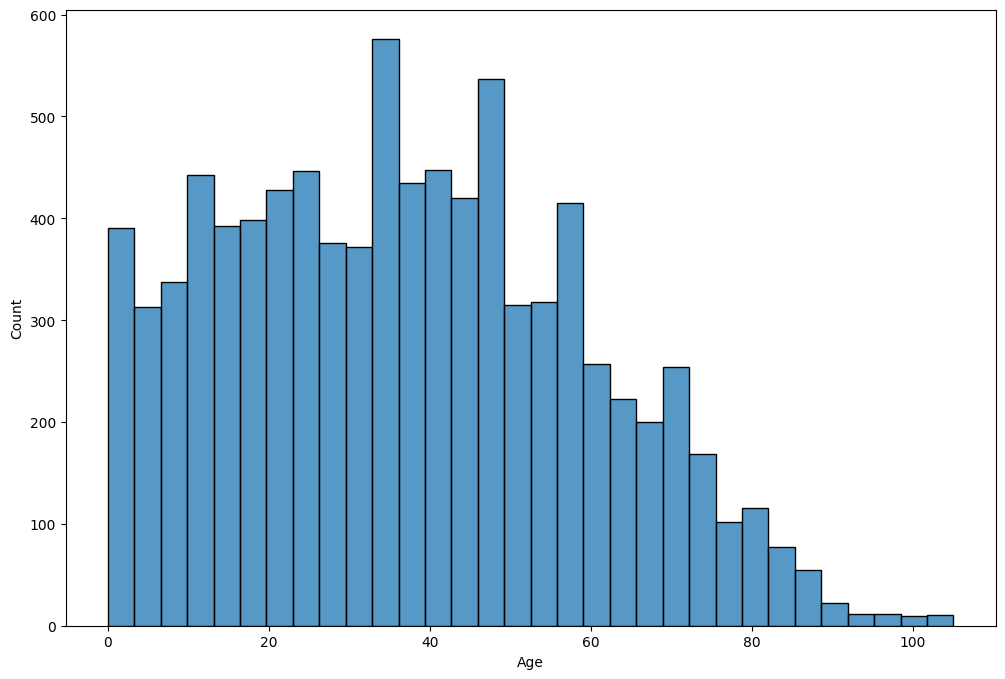

In [52]:
plt.figure(figsize = (12,8))
sns.histplot(df["Age"])

[Text(0.5, 1.0, 'Age Box count')]

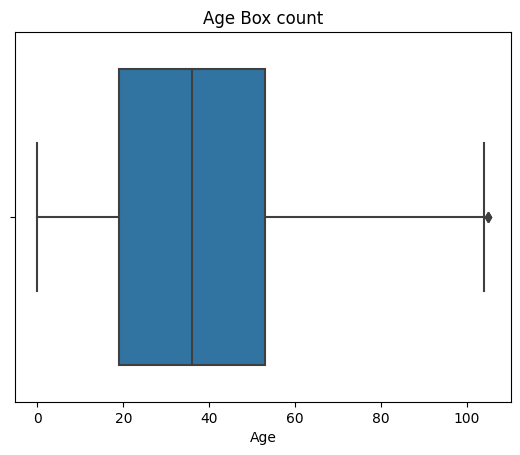

In [53]:
sns.boxplot(x=df["Age"]).set(title = 'Age Box count') # Box plot of Age Column

## Gender colunm

In [54]:
uniqueEntries(df['Gender']) # Checking for unique entries

array(['Female', 'Male', ' '], dtype=object)

In [55]:
spaceEntries(df["Gender"]) #Checking empty rows to check the relationship to the head of house to determine the Gender

House Number         Street First Name   Surname  Age  \
5059            14  Bright Avenue        Jay    Sharpe    6   
5164            49  Bright Avenue   Mohammed  Williams   20   

     Relationship to Head of House Marital Status Gender          Occupation  \
5059                           Son            NaN                    Student   
5164                           Son       Divorced         University Student   

     Infirmity Religion  
5059      None      NaN  
5164      None     None

In [56]:
#Further investigating the space entry to find the Gender by checking the "Relationship to Head of house", "House Number" and "Street" Column
df[ (df['House Number'] == 14) & (df['Street'] == "Bright Avenue")] # possible empty entry

House Number         Street First Name Surname  Age  \
5058            14  Bright Avenue      Rosie  Sharpe   43   
5059            14  Bright Avenue        Jay  Sharpe    6   

     Relationship to Head of House Marital Status  Gender       Occupation  \
5058                          Head         Single  Female  Equities trader   
5059                           Son            NaN                  Student   

     Infirmity  Religion  
5058      None  Catholic  
5059      None       NaN

In [57]:
#Further investigating the space entry to find the Gender by checking the "Relationship to Head of house", "House Number" and "Street" Column
df[ (df['House Number'] == 49) & (df['Street'] == "Bright Avenue")] # possible empty entry

House Number         Street First Name   Surname  Age  \
5161            49  Bright Avenue      Diana  Williams   57   
5162            49  Bright Avenue     Joshua  Williams   59   
5163            49  Bright Avenue      Marie  Williams   27   
5164            49  Bright Avenue   Mohammed  Williams   20   
5165            49  Bright Avenue     Samuel  Williams   20   

     Relationship to Head of House Marital Status  Gender  \
5161                          Head        Married  Female   
5162                       Husband        Married    Male   
5163                      Daughter         Single  Female   
5164                           Son       Divorced           
5165                           Son       Divorced    Male   

                  Occupation Infirmity   Religion  
5161   Pharmacist, community      None  Christian  
5162      Purchasing manager      None  Christian  
5163  Engineer, aeronautical      None       None  
5164      University Student      None       None  
5165      University Student      None       None

## Index 5059 and 5164 relationship to the head of house is "Son" which mean  their Gender is Male and we have to make the change.

Fixing the entries:

In [58]:
df.iat[5059,7] = 'Male'
#df.loc[5059, 'Gender'] = 'Male'

In [59]:
df.iat[5164,7] = 'Male'
#df.loc[5164, 'Gender'] = 'Male'

In [60]:
uniqueEntries(df['Gender']) # confirming the entries

array(['Female', 'Male'], dtype=object)

In [61]:
df['Gender'].value_counts() #confirming unique count

Female    4644
Male      4234
Name: Gender, dtype: int64

## Gender Visualization 

<Axes: xlabel='Gender', ylabel='count'>

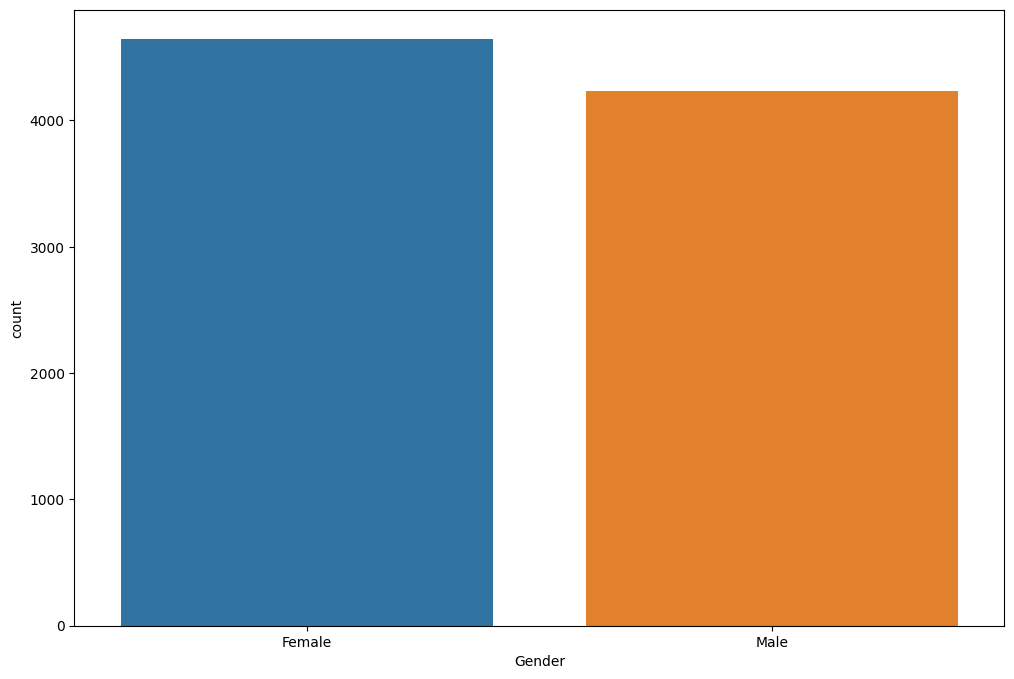

In [62]:
plt.figure(figsize = (12,8)) 
sns.countplot(x = df["Gender"]) # Plotting Gender Column

## Marital Status Column

In [63]:
uniqueEntries(df['Marital Status']) # Unique Entries

array(['Married', 'Single', 'Divorced', 'Widowed', nan, ' '], dtype=object)

In [64]:
countEntries(df['Marital Status']) # count the unique values 

Single      3095
Married     2551
Divorced     861
Widowed      403
               1
Name: Marital Status, dtype: int64

In [65]:
emptyColunms(df['Marital Status']) # checking the number of empty/null entries

1967

In [66]:
spaceEntries(df['Marital Status'])# checking for space entries

House Number         Street First Name Surname  Age  \
1966            57  Tamarisk Road      James  Parker   54   

     Relationship to Head of House Marital Status Gender  \
1966                       Husband                  Male   

                              Occupation Infirmity Religion  
1966  Surveyor, planning and development      None     None

## Marital Status shows we have empty entries and null entries

## Further investigating index 1966 "the space entry" to find the Marital Status by checking the "Relationship to Head of house", "House Number" and "Street" Column

In [67]:
#Further investigating the space entry to find the Marital Status by checking the "Relationship to Head of house", "House Number" and "Street" Column
df[ (df['House Number'] == 57) & (df['Street'] == "Tamarisk Road")] # possible empty entry

House Number         Street First Name Surname  Age  \
1965            57  Tamarisk Road      Molly  Parker   51   
1966            57  Tamarisk Road      James  Parker   54   
1967            57  Tamarisk Road     Sheila  Parker   11   

     Relationship to Head of House Marital Status  Gender  \
1965                          Head        Married  Female   
1966                       Husband                   Male   
1967                      Daughter            NaN  Female   

                              Occupation Infirmity Religion  
1965                         Optometrist      None     None  
1966  Surveyor, planning and development      None     None  
1967                             Student      None      NaN

## We can deduce that index 1965: James Parker's Marrital Status is Married based on the investigation, row 1965 infomation shows she is the head of house and his wife and they have a Daughter which is index:1967 and the Relationship to the Head of house says "Husband" which can make us say he is married

In [68]:
df.iat[1966,6] = 'Married' #changing status of index 1966 to married based on investigation
#df.loc[1966,'Marital Status'] = 'Married'


In [69]:
df[ (df['House Number'] == 57) & (df['Street'] == "Tamarisk Road")] # confirming entry

House Number         Street First Name Surname  Age  \
1965            57  Tamarisk Road      Molly  Parker   51   
1966            57  Tamarisk Road      James  Parker   54   
1967            57  Tamarisk Road     Sheila  Parker   11   

     Relationship to Head of House Marital Status  Gender  \
1965                          Head        Married  Female   
1966                       Husband        Married    Male   
1967                      Daughter            NaN  Female   

                              Occupation Infirmity Religion  
1965                         Optometrist      None     None  
1966  Surveyor, planning and development      None     None  
1967                             Student      None      NaN

In [70]:
#Checking for maximum age
marital = df[df['Marital Status'].isnull()]
max_null_age = marital["Age"].max()
max_null_age

17

## The above shows the maximum number of individualswith no marital status is 17 which is less than 18 and we can change those entries to not available 'NA'

In [71]:
#Checking rows with empty entires
df[df['Marital Status'] == " "]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [72]:
df['Marital Status'].value_counts() #unique value count

Single      3095
Married     2552
Divorced     861
Widowed      403
Name: Marital Status, dtype: int64

## Checking for the age of Individuals that are below 18 and are married

In [73]:
df[ (df['Age'] < 18) & (df['Marital Status'] == "Married")]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [74]:
#pause

In [75]:
df[ (df['Marital Status'] == 'Widowed') & (df['Age'] <= 18)] # possible Wrong Marital Status needs to be further investigated

House Number             Street First Name Surname  Age  \
299             19  Apricotbox Avenue    Shirley    Owen   18   
4595            22     Swansea Stream   Michelle    Cook   18   
6466            55       Sydney Drive     Donald   Patel   18   

     Relationship to Head of House Marital Status  Gender Occupation  \
299                         Lodger        Widowed  Female    Student   
4595                      Daughter        Widowed  Female    Student   
6466                           Son        Widowed    Male    Student   

     Infirmity   Religion  
299       None        NaN  
4595      None  Christian  
6466      None  Christian

In [76]:
df[ (df['House Number'] == 22) & (df['Surname'] == "Cook")] # checking for possible lie entry

House Number          Street First Name Surname  Age  \
4593            22  Swansea Stream      Tracy    Cook   25   
4594            22  Swansea Stream     Stuart    Cook   22   
4595            22  Swansea Stream   Michelle    Cook   18   
4596            22  Swansea Stream       Tina    Cook   16   

     Relationship to Head of House Marital Status  Gender          Occupation  \
4593                      Daughter       Divorced  Female    Catering manager   
4594                           Son       Divorced    Male  University Student   
4595                      Daughter        Widowed  Female             Student   
4596                      Daughter            NaN  Female             Student   

     Infirmity   Religion  
4593      None  Christian  
4594      None       None  
4595      None  Christian  
4596      None        NaN

In [77]:
df[ (df['House Number'] == 55) & (df['Surname'] == "Patel")] # checking for possible lie entry

House Number        Street First Name Surname  Age  \
6464            55  Sydney Drive       Josh   Patel   63   
6465            55  Sydney Drive    Suzanne   Patel   55   
6466            55  Sydney Drive     Donald   Patel   18   
6467            55  Sydney Drive       Sara   Patel   15   

     Relationship to Head of House Marital Status  Gender  \
6464                          Head        Married    Male   
6465                          Wife        Married  Female   
6466                           Son        Widowed    Male   
6467                      Daughter            NaN  Female   

                         Occupation Infirmity   Religion  
6464               Graphic designer      None  Christian  
6465  Restaurant manager, fast food      None  Christian  
6466                        Student      None  Christian  
6467                        Student      None        NaN

## LIE DETECTED

## Donald has a false entry(): looking at his relationship with the head of house his Son and Occupation, we can infer that he is not widowed

In [78]:
df.iat[6466,6] = 'Single' #changing status of index 6466 to single based on investigation

In [79]:
df[ (df['House Number'] == 55) & (df['Surname'] == "Patel")] #confirming entry

House Number        Street First Name Surname  Age  \
6464            55  Sydney Drive       Josh   Patel   63   
6465            55  Sydney Drive    Suzanne   Patel   55   
6466            55  Sydney Drive     Donald   Patel   18   
6467            55  Sydney Drive       Sara   Patel   15   

     Relationship to Head of House Marital Status  Gender  \
6464                          Head        Married    Male   
6465                          Wife        Married  Female   
6466                           Son         Single    Male   
6467                      Daughter            NaN  Female   

                         Occupation Infirmity   Religion  
6464               Graphic designer      None  Christian  
6465  Restaurant manager, fast food      None  Christian  
6466                        Student      None  Christian  
6467                        Student      None        NaN

In [80]:
# Checking the number of married couple aboue 100
df[ (df['Marital Status'] == 'Married') & (df['Age'] >99)] # possible empty entry


House Number            Street First Name   Surname  Age  \
1144            97       Mary Center     Hilary    Powell  103   
1145            97       Mary Center       Sean    Powell  105   
2227            12        Gray Brook    Vincent  Phillips  100   
3770            22   Houghton Circle       Marc   Edwards  104   
3771            22   Houghton Circle   Patricia   Edwards  102   
5717           166  Edinburgh Points    Harriet     Nixon  103   
5718           166  Edinburgh Points   Mohammed     Nixon  101   
6090            23  Aethelred Corner      Barry    Taylor  101   

     Relationship to Head of House Marital Status  Gender  \
1144                          Head        Married  Female   
1145                       Husband        Married    Male   
2227                          Head        Married    Male   
3770                          Head        Married    Male   
3771                          Wife        Married  Female   
5717                          Head        Married  Female   
5718                       Husband        Married    Male   
6090                       Husband        Married    Male   

                                        Occupation Infirmity   Religion  
1144                               Retired Actuary      None       None  
1145                         Retired IT consultant      None       None  
2227                      Retired Product designer      None  Christian  
3770                          Retired Estate agent      None  Christian  
3771               Retired Horticultural therapist      None  Christian  
5717                 Retired Theatre stage manager      None  Christian  
5718                      Retired Product designer      None       None  
6090  Retired Accountant, chartered public finance      None  Christian

In [81]:
df[ (df['House Number'] == 23) & (df['Street'] == 'Aethelred Corner')] # possible false entry


House Number            Street First Name Surname  Age  \
6089            23  Aethelred Corner      Lynne  Taylor   99   
6090            23  Aethelred Corner      Barry  Taylor  101   

     Relationship to Head of House Marital Status  Gender  \
6089                          Head        Married  Female   
6090                       Husband        Married    Male   

                                        Occupation Infirmity   Religion  
6089                       Retired Legal secretary      None  Christian  
6090  Retired Accountant, chartered public finance      None  Christian

In [82]:
df[ (df['House Number'] == 12) & (df['Street'] == 'Gray Brook')] # possible false entry


House Number      Street First Name   Surname  Age  \
2227            12  Gray Brook    Vincent  Phillips  100   
2228            12  Gray Brook     Sheila  Phillips   98   

     Relationship to Head of House Marital Status  Gender  \
2227                          Head        Married    Male   
2228                          Wife        Married  Female   

                    Occupation Infirmity   Religion  
2227  Retired Product designer      None  Christian  
2228      Retired Farm manager      None  Christian

## The above shows no lie with married people above 100

In [83]:
df[ (df['Age'] < 18) & (df['Marital Status'])]

House Number         Street First Name   Surname  Age  \
1803            54    Foster Cove     Amanda    Murray   16   
1975            60  Tamarisk Road    Shirley  Gardiner   17   
2245            26     Gray Brook      Diane    Thomas   16   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1803                          Head       Divorced  Female  Unemployed   
1975                          Head         Single  Female  Unemployed   
2245                          Head         Single  Female  Unemployed   

     Infirmity Religion  
1803      None      NaN  
1975      None      NaN  
2245      None      NaN

In [84]:
df[ (df['House Number'] == 54) & (df['Street'] == 'Foster Cove')] # possible false entry

House Number       Street First Name Surname  Age  \
1803            54  Foster Cove     Amanda  Murray   16   
1804            54  Foster Cove      Holly  Murray    0   
1805            54  Foster Cove      Abdul   Scott   34   
1806            54  Foster Cove    Anthony  Taylor   46   

     Relationship to Head of House Marital Status  Gender  \
1803                          Head       Divorced  Female   
1804                      Daughter            NaN  Female   
1805                        Lodger         Single    Male   
1806                        Lodger       Divorced    Male   

                     Occupation Infirmity   Religion  
1803                 Unemployed      None        NaN  
1804                      Child      None        NaN  
1805         Materials engineer      None     Muslim  
1806  Education officer, museum      None  Christian

In [85]:
df[ (df['House Number'] == 60) & (df['Street'] == 'Tamarisk Road')] # possible false entry

House Number         Street First Name   Surname  Age  \
1975            60  Tamarisk Road    Shirley  Gardiner   17   
1976            60  Tamarisk Road       Iain  Gardiner    0   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1975                          Head         Single  Female  Unemployed   
1976                           Son            NaN    Male       Child   

     Infirmity Religion  
1975      None      NaN  
1976      None      NaN

In [86]:
df[ (df['House Number'] == 26) & (df['Street'] == 'Gray Brook')] # possible false entry

House Number      Street First Name Surname  Age  \
2245            26  Gray Brook      Diane  Thomas   16   
2246            26  Gray Brook     George  Thomas    0   

     Relationship to Head of House Marital Status  Gender  Occupation  \
2245                          Head         Single  Female  Unemployed   
2246                           Son            NaN    Male       Child   

     Infirmity Religion  
2245      None      NaN  
2246      None      NaN

## index 1803: 1975: 2245 are seen as responsible as the "Head of house" with children/dependants

In [87]:
marriage_filter = df['Marital Status'].isna()
marital_filter = df[marriage_filter]
marital_filter['Occupation'].unique()

array(['Student', 'Child'], dtype=object)

In [88]:
# Updating the 'Marital Status' for 'Minors' for individuals aged <= 12
age_limit = 12 # following the UK 1850 civil marriage law
df.loc[df['Age'] <= age_limit, 'Marital Status'] = 'NA'

In [89]:
df[ (df['Age'] <= 12) & (df['Marital Status'])]

House Number             Street First Name         Surname  Age  \
44               1         Beech Lake       Rhys         Skinner   12   
55               1           Todd Row      Megan         Jackson    4   
60               3           Todd Row      Marie         Simpson   10   
61               3           Todd Row      Karen  Walker-Simpson    5   
62               3           Todd Row       Anna  Walker-Simpson    1   
...            ...                ...        ...             ...  ...   
8848             1         King Manor        Guy           Kirby    1   
8849             1         King Manor      Holly           Kirby    0   
8866             1  Glover Manorhouse    Stewart           White    8   
8867             1  Glover Manorhouse   Jonathan           White    7   
8874             1    Price Institute     Graham         Farrell    2   

     Relationship to Head of House Marital Status  Gender Occupation  \
44                             Son             NA    Male    Student   
55                        Daughter             NA  Female      Child   
60                        Daughter             NA  Female    Student   
61                        Daughter             NA  Female    Student   
62                        Daughter             NA  Female      Child   
...                            ...            ...     ...        ...   
8848                           Son             NA    Male      Child   
8849                      Daughter             NA  Female      Child   
8866                           Son             NA    Male    Student   
8867                           Son             NA    Male    Student   
8874                           Son             NA    Male      Child   

     Infirmity Religion  
44        None      NaN  
55        None      NaN  
60        None      NaN  
61        None      NaN  
62        None      NaN  
...        ...      ...  
8848      None      NaN  
8849      None      NaN  
8866      None      NaN  
8867      None      NaN  
8874      None      NaN  

[1386 rows x 11 columns]

In [90]:
df['Marital Status'].value_counts() #count

Single      3096
Married     2552
NA          1386
Divorced     861
Widowed      402
Name: Marital Status, dtype: int64

In [91]:
# filling null values with 'NA'
df['Marital Status'].fillna('NA', inplace=True)

In [92]:
emptyColunms(df['Marital Status']) # checking the number of empty/null entries

0

In [93]:
df['Marital Status'].isnull().sum()

0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8878 non-null   int64 
 1   Street                         8878 non-null   object
 2   First Name                     8878 non-null   object
 3   Surname                        8878 non-null   object
 4   Age                            8878 non-null   int64 
 5   Relationship to Head of House  8878 non-null   object
 6   Marital Status                 8878 non-null   object
 7   Gender                         8878 non-null   object
 8   Occupation                     8878 non-null   object
 9   Infirmity                      8878 non-null   object
 10  Religion                       6857 non-null   object
dtypes: int64(2), object(9)
memory usage: 763.1+ KB


## Occupation

In [95]:
uniqueEntries(df['Occupation']) #unique entries

array(['Copy', 'Immigration officer', 'Merchant navy officer', ...,
       'Retired Transport planner', 'Retired Multimedia programmer',
       'Retired Animal nutritionist'], dtype=object)

In [96]:
df['Occupation'].value_counts()

Student                               1577
University Student                     592
Unemployed                             589
Child                                  494
PhD Student                             20
                                      ... 
Retired Designer, interior/spatial       1
Retired Gaffer                           1
Retired Sports development officer       1
Retired Public relations officer         1
Retired Animal nutritionist              1
Name: Occupation, Length: 1126, dtype: int64

In [97]:
## Checking for empty entry

spaceEntries(df['Occupation'])

House Number            Street First Name Surname  Age  \
5662           133  Edinburgh Points     Lesley   Green   71   
8519            13   Morgan Crescent     Steven  Norman   46   

     Relationship to Head of House Marital Status  Gender Occupation  \
5662                          Head        Married  Female              
8519                       Partner         Single    Male              

     Infirmity   Religion  
5662      None  Christian  
8519      None       None

## Using the most common occupation(mode) within the age range to fill the empty occupation

In [98]:
df[ (df['Age'] >= 65) & (df['Age'] >= 75) & (df['Gender'] == 'Female')]['Occupation'].mode() # possible Prediction of Age Group Job


0    Unemployed
Name: Occupation, dtype: object

In [99]:
df[ (df['Age'] >= 40) & (df['Age'] >= 50) & (df['Gender'] == 'Male')]['Occupation'].mode() # possible Prediction of Age Group Job


0    Unemployed
Name: Occupation, dtype: object

In [100]:
df.iat[5662,8] = 'Unemployed' # index 5662 
df.iat[8519,8] = 'Unemployed' # index 8519

In [101]:
spaceEntries(df['Occupation'])

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [102]:
# Function to Group Occupation

# Grouping occupation column for easy analysis to calculate employment rate

def occupationGroup(occupation_status):
    
    if occupation_status == 'PhD Student':
        occupation_status = 'University Student'
    if 'Retired' in occupation_status:
        occupation_status = 'Retired'
    if 'Unemployed' in occupation_status:
        occupation_status = 'Unemployed'
    if occupation_status not in ['University Student','Student', 'Retired', 'Unemployed', 'Child']:
        occupation_status = 'Employed'
    else:
        pass
    return occupation_status

df['Grouped Occupation'] = df['Occupation'].map(occupationGroup)

In [103]:
df['Grouped Occupation'].value_counts() 

Employed              4720
Student               1577
Retired                884
University Student     612
Unemployed             591
Child                  494
Name: Grouped Occupation, dtype: int64

In [104]:
df['Grouped Occupation'] = np.where((df['Age'] >= 65)& (df['Occupation'] == 'Unemployed'), 'Retired', df['Grouped Occupation'])

## Investigating Infirmity Column

In [105]:
uniqueEntries(df["Infirmity"]) #Unique Entries

array(['None', 'Physical Disability', 'Blind', 'Disabled',
       'Mental Disability', 'Deaf', 'Unknown Infection', ' '],
      dtype=object)

In [106]:
spaceEntries(df["Infirmity"])  #Space Entries

House Number           Street First Name   Surname  Age  \
3690             7   Marshall Inlet     Thomas    Wright   38   
3879             7     Station Road   Kayleigh    Taylor   40   
5891            13    James Station   Samantha    Hewitt   55   
6296             1     Sydney Drive    Melanie     Brown   27   
6772            34  Summer Villages     Gareth  Phillips   57   
7672            18     Begum Ridges      Carly    Waters   15   
7780             2  Coconutbow Lane       Ross    Newton   61   
8732             1      Ward Fields  Francesca   Edwards   32   

     Relationship to Head of House Marital Status  Gender  \
3690                       Husband        Married    Male   
3879                          Head        Married  Female   
5891                          Head         Single  Female   
6296                          Head         Single  Female   
6772                          Head        Married    Male   
7672                      Daughter             NA  Female   
7780                          Head         Single    Male   
8732                          Head        Married  Female   

                                             Occupation Infirmity   Religion  \
3690                                        Firefighter                 None   
3879             Teacher, English as a foreign language            Christian   
5891                          Public affairs consultant             Catholic   
6296                             Applications developer                 None   
6772                          Psychologist, counselling            Methodist   
7672                                            Student                  NaN   
7780                               Newspaper journalist            Christian   
8732  Historic buildings inspector/conservation officer                 None   

     Grouped Occupation  
3690           Employed  
3879           Employed  
5891           Employed  
6296           Employed  
6772           Employed  
7672            Student  
7780           Employed  
8732           Employed

In [107]:
df["Infirmity"].value_counts() #checking unique count of the infirmity

None                   8805
Physical Disability      18
Disabled                 11
Mental Disability        10
Deaf                      9
Unknown Infection         9
Blind                     8
                          8
Name: Infirmity, dtype: int64

## None is the highest Infirmity and since the filled where empty it is safe to infer that they have no Infirmity

In [108]:
infirmity_mode = str(df['Infirmity'].mode())
print(infirmity_mode)

0    None
Name: Infirmity, dtype: object


In [109]:
# replacing the empty values with "None" since it is the mode of the column
df['Infirmity'].replace(" ", "None", inplace=True) 

## Replacing the empty entries with the mode

In [110]:
df["Infirmity"].value_counts() #confirming the value

None                   8813
Physical Disability      18
Disabled                 11
Mental Disability        10
Deaf                      9
Unknown Infection         9
Blind                     8
Name: Infirmity, dtype: int64

In [111]:
df.info() # checking the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8878 non-null   int64 
 1   Street                         8878 non-null   object
 2   First Name                     8878 non-null   object
 3   Surname                        8878 non-null   object
 4   Age                            8878 non-null   int64 
 5   Relationship to Head of House  8878 non-null   object
 6   Marital Status                 8878 non-null   object
 7   Gender                         8878 non-null   object
 8   Occupation                     8878 non-null   object
 9   Infirmity                      8878 non-null   object
 10  Religion                       6857 non-null   object
 11  Grouped Occupation             8878 non-null   object
dtypes: int64(2), object(10)
memory usage: 832.4+ KB


## Religion Column

In [112]:
spaceEntries(df['Religion']) # checking for space entries

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Grouped Occupation]
Index: []

In [113]:
emptyColunms(df['Religion']) # checking for nan values

2021

In [114]:
uniqueEntries(df['Religion']) # checking for unique entries

array(['Methodist', 'None', 'Catholic', 'Christian', nan, 'Muslim',
       'Sikh', 'Jewish', 'Sith', 'Bahai', 'Private', 'Nope', 'Hindu'],
      dtype=object)

## Fixing Religion

In [115]:
df['Religion'].value_counts()

None         2979
Christian    2100
Catholic      955
Methodist     578
Muslim        130
Sikh           65
Jewish         40
Private         4
Bahai           2
Hindu           2
Sith            1
Nope            1
Name: Religion, dtype: int64

In [116]:
df['Religion'].replace("Sith", "None", inplace = True) # Sith is not a religion and can not be accepted officially in the UK census.

Sith is not a religion: https://www.researchgate.net/publication/368713271_HISTORY_OF_SITH_RELIGIOSITY_-_Jedi_and_Sith_religion_in_the_offline_world#:~:text=While%20Sith%20realism%20contains%20philosophical,culture%20world%20of%20Star%20Wars.

In [117]:
df['Religion'].replace("Private", "None", inplace = True) # Private has been changed to None

In [118]:
df['Religion'].replace("Nope", "None", inplace = True) # Nope serves as None 

In [119]:
df['Religion'].value_counts()

None         2985
Christian    2100
Catholic      955
Methodist     578
Muslim        130
Sikh           65
Jewish         40
Bahai           2
Hindu           2
Name: Religion, dtype: int64

## Investigating the religion column to check for age  

No religion can be a valid response based on UK and Wales Relion entries based on this facts we will take the data as a possible entry : https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/religion/bulletins/religionenglandandwales/census2021

In [120]:
df[df['Religion'] .isna() == 1]

House Number             Street First Name      Surname  Age  \
12               6        Garner Fork       Luke  Stone-Marsh   16   
34               2    Brightloop Lane   Kayleigh        Jones   15   
44               1         Beech Lake       Rhys      Skinner   12   
55               1           Todd Row      Megan      Jackson    4   
60               3           Todd Row      Marie      Simpson   10   
...            ...                ...        ...          ...  ...   
8857             1    Hale Stronghold    Stewart         Ford   13   
8865             1  Glover Manorhouse      Sarah        White   13   
8866             1  Glover Manorhouse    Stewart        White    8   
8867             1  Glover Manorhouse   Jonathan        White    7   
8874             1    Price Institute     Graham      Farrell    2   

     Relationship to Head of House Marital Status  Gender Occupation  \
12                             Son             NA    Male    Student   
34                        Daughter             NA  Female    Student   
44                             Son             NA    Male    Student   
55                        Daughter             NA  Female      Child   
60                        Daughter             NA  Female    Student   
...                            ...            ...     ...        ...   
8857                           Son             NA    Male    Student   
8865                      Daughter             NA  Female    Student   
8866                           Son             NA    Male    Student   
8867                           Son             NA    Male    Student   
8874                           Son             NA    Male      Child   

     Infirmity Religion Grouped Occupation  
12        None      NaN            Student  
34        None      NaN            Student  
44        None      NaN            Student  
55        None      NaN              Child  
60        None      NaN            Student  
...        ...      ...                ...  
8857      None      NaN            Student  
8865      None      NaN            Student  
8866      None      NaN            Student  
8867      None      NaN            Student  
8874      None      NaN              Child  

[2021 rows x 12 columns]

In [121]:
df[(df['Age'] < 18)] ['Religion'].isna().sum()

1970

In [122]:
#if Surname = Surname & Occupation == Child or Occupation == Student & Religion of the parent is filled

## Following the UK law that Parents can determine the religion of their children below 18
## So I used the Head of house as a parameter to determine the religion of the age minors < 18

Parents can determine the religion of the child Source:https://www.citizensadvice.org.uk/law-and-courts/civil-rights/young-people-s-rights/#:~:text=Parents%20have%20the%20right%20to,can%20be%20asked%20to%20intervene.

## For ages less than 18 fill the religion with the religion of the family's  head of house

In [123]:
# Grouping by household
household_group = df.groupby(["House Number", "Street", "Surname"])

# Looping through each household
for group_name, group_data in household_group:
    # Finding the religion of the Head of the household
    head_data = group_data[group_data['Relationship to Head of House'] == 'Head']['Religion']
    
    mode_value = group_data["Religion"].mode()
    
    # Checking if there is a Head in the household
    if not head_data.empty:
        head_religion = head_data.iloc[0]

        # Checking if Head's religion is not nan
        if pd.notna(head_religion):
            # Finding indices of minors with nan religion in the household
            minors_index = group_data[(group_data['Age'] < 18) & (group_data['Religion'].isna())].index

            # Filling nan religion values for minors with the Head's religion
            df.loc[minors_index, 'Religion'] = head_religion


In [124]:
uniqueEntries(df['Religion']) #confimring the Religion column

array(['Methodist', 'None', 'Catholic', 'Christian', nan, 'Muslim',
       'Sikh', 'Jewish', 'Bahai', 'Hindu'], dtype=object)

In [125]:
df[(df['Age'] < 18)] ['Religion'].isna().sum() 

265

# Based on the UK census data collection policy in UK and Wales that No Religion is also an entry for Religion we can infer the other

https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/religion/bulletins/religionenglandandwales/census2021

In [126]:
df['Religion'].fillna("None", inplace = True) # Fill null values as NA / None representing No Religion

In [127]:
df['Religion'].isnull().sum()

0

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8878 non-null   int64 
 1   Street                         8878 non-null   object
 2   First Name                     8878 non-null   object
 3   Surname                        8878 non-null   object
 4   Age                            8878 non-null   int64 
 5   Relationship to Head of House  8878 non-null   object
 6   Marital Status                 8878 non-null   object
 7   Gender                         8878 non-null   object
 8   Occupation                     8878 non-null   object
 9   Infirmity                      8878 non-null   object
 10  Religion                       8878 non-null   object
 11  Grouped Occupation             8878 non-null   object
dtypes: int64(2), object(10)
memory usage: 832.4+ KB


In [129]:
df

House Number           Street First Name         Surname  Age  \
0                1      Garner Fork    Carolyn          Murray   52   
1                1      Garner Fork       Kyle          Murray   53   
2                1      Garner Fork    Suzanne  Elliott-Murray   24   
3                2      Garner Fork      Naomi          Archer   34   
4                2      Garner Fork     Martin          Barnes   36   
...            ...              ...        ...             ...  ...   
8873             1  Price Institute      Wendy         Farrell   38   
8874             1  Price Institute     Graham         Farrell    2   
8875             1  Price Institute      Janet            Dean   39   
8876             1  Price Institute    Shirley           Smith   63   
8877             1  Price Institute       Neil       Wilkinson   51   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married  Female   
1                          Husband        Married    Male   
2                         Daughter         Single  Female   
3                             Head         Single  Female   
4                          Partner         Single    Male   
...                            ...            ...     ...   
8873                          Head         Single  Female   
8874                           Son             NA    Male   
8875                        Cousin         Single  Female   
8876                       Sibling       Divorced  Female   
8877                        Lodger       Divorced    Male   

                 Occupation Infirmity   Religion Grouped Occupation  
0                      Copy      None  Methodist           Employed  
1       Immigration officer      None  Methodist           Employed  
2     Merchant navy officer      None  Methodist           Employed  
3     Merchant navy officer      None       None           Employed  
4            Futures trader      None       None           Employed  
...                     ...       ...        ...                ...  
8873             Unemployed      None     Muslim         Unemployed  
8874                  Child      None     Muslim              Child  
8875                   Make      None       None           Employed  
8876    Art gallery manager      None  Methodist           Employed  
8877     Surveyor, minerals      None  Christian           Employed  

[8878 rows x 12 columns]

In [130]:
uniqueEntries(df['Religion'])

array(['Methodist', 'None', 'Catholic', 'Christian', 'Muslim', 'Sikh',
       'Jewish', 'Bahai', 'Hindu'], dtype=object)

In [131]:
## Religion sorting

In [132]:
religion_category = df.groupby(['Religion']).size()

religion_values = []
religion_count = []

for keys, values in enumerate(religion_category):
    religion_values.append(religion_category.keys()[keys])
    religion_count.append(values)
    
religion_df = pd.DataFrame()
religion_df['Religion'] = religion_values
religion_df['Count'] = religion_count

religion_sorting = religion_df.sort_values(by = ['Count'], ascending = False).head(20)
religion_sorting

Religion  Count
7       None   3917
2  Christian   2571
1   Catholic   1354
5  Methodist    741
6     Muslim    157
8       Sikh     73
4     Jewish     58
3      Hindu      5
0      Bahai      2

## This informs us that the larger percentage of the Identified Religion community are Christians and also based on the top 3 denomination

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8878 non-null   int64 
 1   Street                         8878 non-null   object
 2   First Name                     8878 non-null   object
 3   Surname                        8878 non-null   object
 4   Age                            8878 non-null   int64 
 5   Relationship to Head of House  8878 non-null   object
 6   Marital Status                 8878 non-null   object
 7   Gender                         8878 non-null   object
 8   Occupation                     8878 non-null   object
 9   Infirmity                      8878 non-null   object
 10  Religion                       8878 non-null   object
 11  Grouped Occupation             8878 non-null   object
dtypes: int64(2), object(10)
memory usage: 832.4+ KB


## Investigating Firstname Column

In [134]:
spaceEntries(df['First Name']) # confirming the column

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Grouped Occupation]
Index: []

In [135]:
emptyColunms(df['First Name'])

0

## Investigating Surname Column

In [136]:
df['Surname'].unique()

array(['Murray', 'Elliott-Murray', 'Archer', 'Barnes', 'Murphy',
       'Pearson', 'Taylor', 'Johnston', 'Stone', 'Stone-Marsh', 'Ward',
       'Reed', 'Steele', 'Watts', 'Joyce', 'Mason', 'Smith', 'Parker',
       'Gray', 'Webb', 'Ross', 'Elliott', 'Phillips', 'Davies', 'Jones',
       'Ashton', 'Lloyd', 'Brown', 'Power', 'Norris', 'Edwards', 'Chan',
       'Skinner', 'Birch', 'Morris', 'Horton', 'White', 'Wallace', 'Bray',
       'Benson', 'Foster', 'Jackson', 'Baker', 'Simpson',
       'Walker-Simpson', 'Williams', 'Turner', 'Chandler', 'Evans',
       'Miller', 'Haynes', 'Pickering', 'Reynolds', 'Todd', 'Mills',
       'Watson-Todd', 'Clark', 'Stephens', 'Allen', 'Stevens', 'Howells',
       'Roberts', 'Kirk', 'Ellis', 'James', 'Peters', 'Singh', 'Bentley',
       'Adams', 'Powell', 'Green', 'Newman', 'Payne', 'Cox', 'Wells',
       'Shah', 'Lees', 'Porter', 'Mitchell', 'Berry', 'Sanderson',
       'Thompson', 'McLean', 'Ferguson', 'Robson', 'Bennett', 'Finch',
       'Burgess', 'M

In [137]:
df['Surname'].isnull().any()

False

In [138]:
emptyColunms(df['Surname']) # possible empty entry

0

In [139]:
spaceEntries(df['Surname']) # possible empty entry

House Number          Street First Name Surname  Age  \
1418             7   Myers Corners      Naomi           25   
4515             2  Swansea Stream    William           36   

     Relationship to Head of House Marital Status  Gender          Occupation  \
1418                        Lodger         Single  Female  Press photographer   
4515                          None         Single    Male  Secretary, company   

     Infirmity   Religion Grouped Occupation  
1418      None       None           Employed  
4515      None  Christian           Employed

In [140]:
## We have 2 space entries for surname column to investigate I will take the house number 

In [141]:
df[ (df['House Number'] == 7) & (df['Street'] == "Myers Corners")] # possible empty entry

House Number         Street First Name   Surname  Age  \
1417             7  Myers Corners       Tina     Ellis   30   
1418             7  Myers Corners      Naomi             25   
1419             7  Myers Corners      Allan  Williams   41   
1420             7  Myers Corners        Roy    Graham   47   
1421             7  Myers Corners      Jenna     Ahmed   57   
1422             7  Myers Corners     Tracey    Bailey   62   

     Relationship to Head of House Marital Status  Gender  \
1417                          Head       Divorced  Female   
1418                        Lodger         Single  Female   
1419                        Lodger         Single    Male   
1420                        Lodger         Single    Male   
1421                        Lodger         Single  Female   
1422                        Lodger         Single  Female   

                        Occupation Infirmity   Religion Grouped Occupation  
1417         Insurance underwriter      None       None           Employed  
1418            Press photographer      None       None           Employed  
1419       Diagnostic radiographer      None  Christian           Employed  
1420                   Tax adviser      None       None           Employed  
1421           Mechanical engineer      None  Christian           Employed  
1422  Trade union research officer      None       None           Employed

In [142]:
df[ (df['House Number'] == 2) & (df['Street'] == "Swansea Stream")] # possible empty entry

House Number          Street First Name   Surname  Age  \
4514             2  Swansea Stream     Kirsty   Harding   26   
4515             2  Swansea Stream    William             36   
4516             2  Swansea Stream     Janice      Carr   28   
4517             2  Swansea Stream       Kyle    Mellor   54   
4518             2  Swansea Stream    Timothy  Harrison   37   

     Relationship to Head of House Marital Status  Gender  \
4514                          Head         Single  Female   
4515                          None         Single    Male   
4516                          None         Single  Female   
4517                          None       Divorced    Male   
4518                          None         Single    Male   

                  Occupation Infirmity   Religion Grouped Occupation  
4514            Sports coach      None       None           Employed  
4515      Secretary, company      None  Christian           Employed  
4516  Surveyor, hydrographic      None       None           Employed  
4517          Retail manager      None  Christian           Employed  
4518              Unemployed      None  Christian         Unemployed

In [143]:
df[ (df['First Name'] == 'William') & (df['Street'] == "Swansea Stream")] # possible empty entry

House Number          Street First Name Surname  Age  \
4515             2  Swansea Stream    William           36   

     Relationship to Head of House Marital Status Gender          Occupation  \
4515                          None         Single   Male  Secretary, company   

     Infirmity   Religion Grouped Occupation  
4515      None  Christian           Employed

The 2 columns 1418,4515 would be dropped because after further investigation, there is no way to know the surnames of this people, so we have to remove the column so we can have a much cleaner data for analysis. 

## Data Fix

In [144]:
# Removing for the first entry
# Remove rows where 'First Name' is 'William' and 'Street' is 'Swansea Stream'
df = df[~((df['First Name'] == 'Naomi') & (df['Street'] == 'Myers Corners'))]

# Reset the index of the DataFrame after the rows are removed
df.reset_index(drop=True, inplace=True)

In [145]:
# Removing for the second entry
# Remove rows where 'First Name' is 'William' and 'Street' is 'Swansea Stream'
df = df[~((df['First Name'] == 'William') & (df['Street'] == 'Swansea Stream'))]

# Reset the index of the DataFrame after the rows are removed
df.reset_index(drop=True, inplace=True)


In [146]:
spaceEntries(df['Surname']) # possible empty entry

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Grouped Occupation]
Index: []

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8874 entries, 0 to 8873
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8874 non-null   int64 
 1   Street                         8874 non-null   object
 2   First Name                     8874 non-null   object
 3   Surname                        8874 non-null   object
 4   Age                            8874 non-null   int64 
 5   Relationship to Head of House  8874 non-null   object
 6   Marital Status                 8874 non-null   object
 7   Gender                         8874 non-null   object
 8   Occupation                     8874 non-null   object
 9   Infirmity                      8874 non-null   object
 10  Religion                       8874 non-null   object
 11  Grouped Occupation             8874 non-null   object
dtypes: int64(2), object(10)
memory usage: 832.1+ KB


## House Occupancy 

In [148]:
# Group by 'House Number' and 'Street', then count the occupancy
occupancy_series = df.groupby(['House Number', 'Street']).size()

# Reset the index of the series and create a DataFrame
occupancy_df = occupancy_series.reset_index(name='Occupancy')

occupancy_df


House Number             Street  Occupancy
0                1   Aethelred Corner          1
1                1  Apricotbox Avenue          5
2                1   Armstrong Street          1
3                1      Bailey Branch          4
4                1       Baker Branch          1
...            ...                ...        ...
3379           232   Edinburgh Points          1
3380           233   Edinburgh Points          3
3381           234   Edinburgh Points          1
3382           235   Edinburgh Points          1
3383           236   Edinburgh Points          1

[3384 rows x 3 columns]

In [149]:
occupancy_df.describe()# describing the house occupancy if it's over used or under used

House Number    Occupancy
count   3384.000000  3384.000000
mean      45.520095     2.622340
std       50.553041     1.661705
min        1.000000     1.000000
25%       10.000000     1.000000
50%       25.000000     2.000000
75%       57.000000     4.000000
max      236.000000    21.000000

 The figure below, shows the median occupancy level of the house is 2 withing the population and based on the mean and median values, most households seem to have a normal occupancy level which depends on the different family sizes and house capacities. However, the first quartile shows only 1 person per house which shows the house is underused. The third quartile (75%) also shows possible house over use with an occupancy of 4 per house depending on the house capacity. The max shows the highest occupancy of 21 per house which assumes house over-use. Though we know there are several students within the population so we can assume a hotel or hostel communal living in some environment based on that we can say the house occupancy by the population is both under and overused.

Text(0.5, 1.0, 'Occupancy plot')

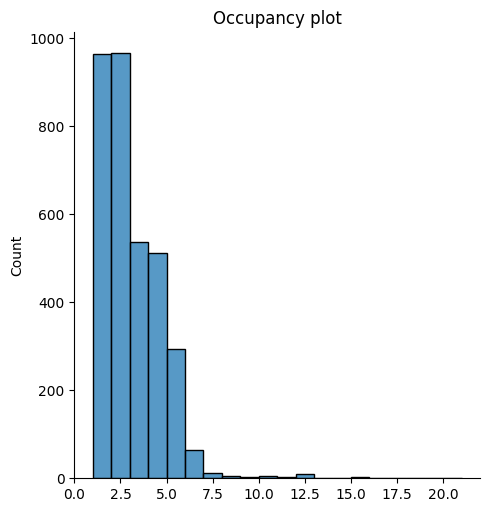

In [150]:
sns.displot(data = occupancy_series, binwidth = 1)
plt.title('Occupancy plot')

In [151]:
occupancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   House Number  3384 non-null   int64 
 1   Street        3384 non-null   object
 2   Occupancy     3384 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 79.4+ KB


## Divorce Rate

Calculating the Divorce Rate:

For the Entire Population:
Find the total number of individuals in the population.
Find the number of individuals who are divorced.
Calculate the divorce rate as: (Number of Divorced Individuals÷Total Population) × 1,000

In [152]:
df.groupby('Marital Status')['Age'].describe()

count       mean        std   min   25%   50%   75%    max
Marital Status                                                             
Divorced         861.0  41.912892  16.589730  16.0  29.0  39.0  53.0   89.0
Married         2551.0  51.702470  16.727378  18.0  39.0  50.0  64.0  105.0
NA              1967.0   8.868327   5.101857   0.0   4.0   9.0  13.0   17.0
Single          3093.0  37.711607  14.347931  16.0  25.0  36.0  48.0  100.0
Widowed          402.0  67.681592  18.251174  18.0  66.0  72.0  78.0  105.0

In [153]:
#df.groupby('Grouped Occupation')['Relationship to Head of House'].describe()

In [154]:
#df.groupby('Relationship to Head of House')['Grouped Occupation'].describe()

In [155]:
# Total number of individuals with marital status
total_marital_status = df["Marital Status"].value_counts().sum()

# Total number of divorced individuals
divorced_number = df[df["Marital Status"] == "Divorced"].shape[0]

# the divorce rate per 1000 marriages
divorce_rate = (divorced_number / total_marital_status) * 1000

# Print the divorce rate, rounded to the nearest integer
print("The divorce rate per 1000 marriages is:", round(divorce_rate))


The divorce rate per 1000 marriages is: 97


## Marriage Rate

In [156]:

# Total number of individuals with a marital status
total_marital_status = df["Marital Status"].value_counts().sum()

# Total number of married individuals
marriage_number = df[df["Marital Status"] == "Married"].shape[0]

# Total number of divorced individuals
divorced_number = df[df["Marital Status"] == "Divorced"].shape[0]

# Sum of married and divorced  individuals (because divorced people were once married)
marital_number = marriage_number + divorced_number

# Marriage rate per 1000 individuals
marriage_rate = (marital_number/total_marital_status)*1000

print("The marriage rate per 1000 individuals is:", round(marriage_rate))

The marriage rate per 1000 individuals is: 384


## Birth Rate and Fertility rate

In [157]:
# Total population
total_population = df.shape[0]

# Number of births ( age 0 representing new babies)
no_of_birth = df[df['Age'] == 0].shape[0]

# Number of women of childbearing age 15 - 45 for UK
women_of_childbearing_age = df[(df['Gender'] == 'Female') & (df['Age'] >= 15) & (df['Age'] <= 45)].shape[0]

print("Women of childbearing age is:", women_of_childbearing_age)
print("Number of births is:", no_of_birth)

# Birth rate per 1000 persons
birth_rate = (no_of_birth / total_population) * 1000

# Fertility rate per 1000 women of childbearing age
fertility_rate = (no_of_birth / women_of_childbearing_age) * 1000

print('Births per 1000 is:', round(birth_rate))
print('Fertility rate per 1000 women of birth age is:', round(fertility_rate))


Women of childbearing age is: 2214
Number of births is: 84
Births per 1000 is: 9
Fertility rate per 1000 women of birth age is: 38


Women bearing age: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/conceptionandfertilityrates/bulletins/childbearingforwomenbornindifferentyearsenglandandwales/2020#:~:text=A%20woman%27s%20childbearing%20is%20assumed,not%20affect%20the%20overall%20patterns.

## Death rate based on the Age group difference per 1000 persons

This is another difficult rate to decide upon. Without access to registry information, or access to a prior census, we are forced to make some assumptions. Fundamentally, what we want to compute is the number of deaths per 1,000 of the population per annum so that we can then compare it to the birth rate.

In [158]:
# Function to calculate the death rate per 1000 persons based on the life expectancy of age 65/66

def death_rate(ages, lower_bound_group1, upper_bound_group1, lower_bound_group2, upper_bound_group2 ):
    
    age_group1 = [age for age in ages if lower_bound_group1 <= age <= upper_bound_group1]
    age_group2 = [age for age in ages if lower_bound_group2 <= age <= upper_bound_group2]
    
    # Assuming the number of deaths is the difference in the population size between the two groups
    # This is a simplified model and may not reflect actual death rates
    death_rate = 1000 * (len(age_group1) - len(age_group2)) / len(ages)
    
    return death_rate

# Sample data for Ages would be needed here. Replace 'Ages' with an actual list of ages.
# Ages = [list of ages]

Ages = df['Age']

# Calculate death rates for different age groups
death_rate1 = death_rate(Ages, 66, 70, 71, 75)
death_rate2 = death_rate(Ages, 76, 80, 81, 85)
death_rate3 = death_rate(Ages, 86, 90, 91, 95)
death_rate4 = death_rate(Ages, 96, 100, 101, 105)

# Sum the death rates of the different age groups
total_death_rate = death_rate1 + death_rate2 + death_rate3 + death_rate4 


# Print the total death rate for the specified age groups
print(f"The total deaths across the specified groups = {round(total_death_rate)} per 1000 persons")

# Print the rounded death rates for each age group
#print(round(death_rate1))
#print(round(death_rate2))
#print(round(death_rate3))
#print(round(death_rate4))


The total deaths across the specified groups = 16 per 1000 persons


Death rate source: https://www.statista.com/statistics/1125118/death-rate-united-kingdom-uk-by-age/

## This indicates shows the population has low mortality rate 

In [159]:
# Filter the DataFrame to include only ages between 65 and 105
aged_population = df[df['Age'].between(65, 105)]

# Group by 'Age', count the number of occurrences, and sort in descending order of age
age_number = aged_population.groupby('Age').size().sort_index(ascending=False)

# Shift the age_counts by one position to calculate the difference between adjacent age groups
shifted_age_number = age_number.shift(-1)

# Estimate the number of deaths per age group
estimated_deaths_per_age_group = age_number - shifted_age_number

# Sum these estimated deaths to get the total estimated deaths
total_estimated_deaths = estimated_deaths_per_age_group.sum()

# Calculate the total aged population
total_aged_population = aged_population.shape[0]

# Calculate the death rate per 1000 individuals
death_rate_per_1000 = (total_estimated_deaths / total_aged_population) * 1000

print("Estimated death rate per 1000 aged individuals (65-105 years):", death_rate_per_1000)


Estimated death rate per 1000 aged individuals (65-105 years): -61.206120612061206


## Data Visualization and Analysis

## Age Pyramid

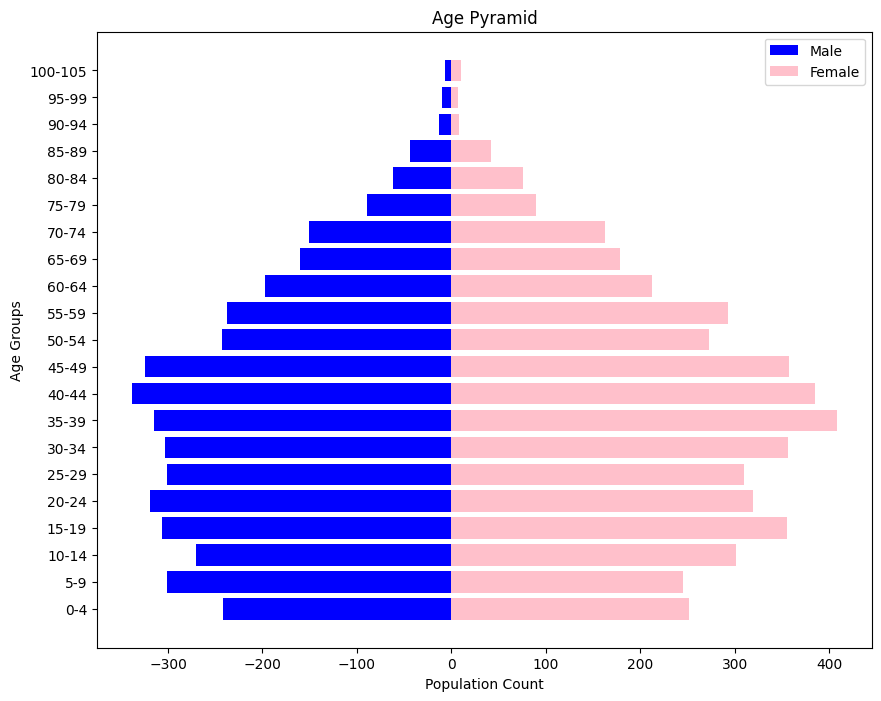

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8874 entries, 0 to 8873
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8874 non-null   int64   
 1   Street                         8874 non-null   object  
 2   First Name                     8874 non-null   object  
 3   Surname                        8874 non-null   object  
 4   Age                            8874 non-null   int64   
 5   Relationship to Head of House  8874 non-null   object  
 6   Marital Status                 8874 non-null   object  
 7   Gender                         8874 non-null   object  
 8   Occupation                     8874 non-null   object  
 9   Infirmity                      8874 non-null   object  
 10  Religion                       8874 non-null   object  
 11  Grouped Occupation             8874 non-null   object  
 12  Age Group                      887

In [160]:
# Defining age bins and labels for the age group
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 106]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-105']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Counting male and female population in each age group
male_counts = [df[(df['Gender'] == 'Male') & (df['Age Group'] == label)].shape[0] for label in age_labels]
female_counts = [df[(df['Gender'] == 'Female') & (df['Age Group'] == label)].shape[0] for label in age_labels]

# Creating the age pyramid bar chart
plt.figure(figsize=(10, 8))
plt.barh(age_labels, [-x for x in male_counts], color='blue', label='Male')
plt.barh(age_labels, female_counts, color='pink', label='Female')

plt.xlabel('Population Count')
plt.title('Age Pyramid')
plt.legend()
plt.ylabel('Age Groups')
plt.show()

# Displaying dataframe information
df.info()

Text(0.5, 1.0, 'Religion Plot')

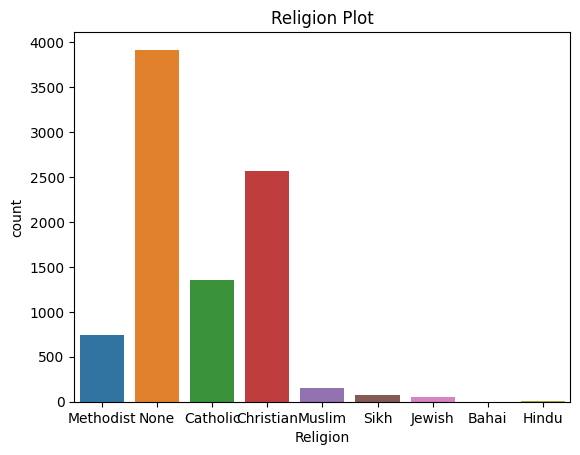

In [161]:
# Plotting of religions column
sns.countplot( x = df["Religion"])
plt.title("Religion Plot")

Text(0.5, 1.0, 'Gender Plot')

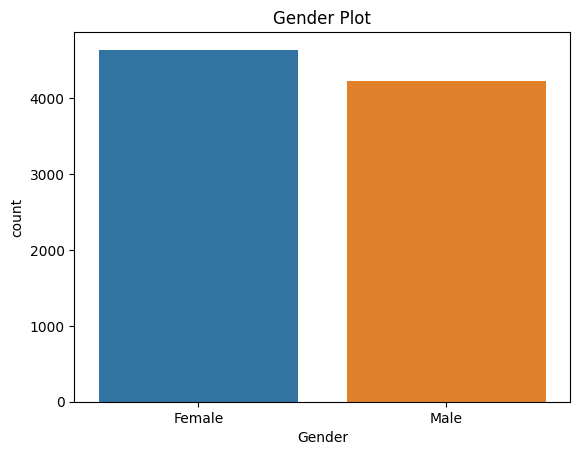

In [162]:
# Gender Plot
sns.countplot(x = df["Gender"])
plt.title('Gender Plot')

## Visualisation Gender, Marital status,Relationship to Head of House

Text(0.5, 1.0, 'Marital Status and Gender Plot')

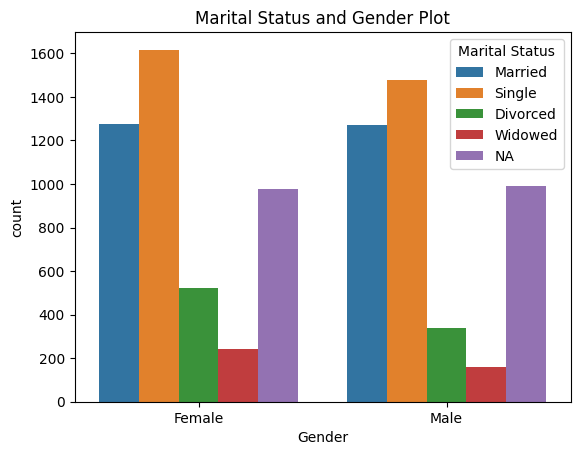

In [163]:
# Gender column and Marital Hue Plot
sns.countplot(data=df,x="Gender",hue = "Marital Status")
plt.title('Marital Status and Gender Plot')

Text(0.5, 1.0, 'Marital Status with Gender as a category')

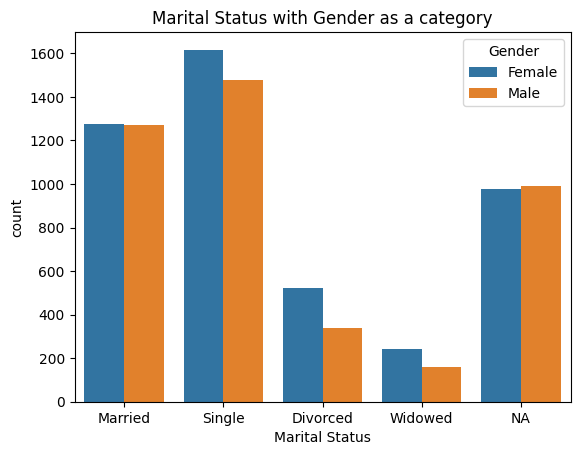

In [164]:
# Marital column and Gender Hue Plot
sns.countplot(data=df, x= "Marital Status" ,hue = "Gender")
plt.title('Marital Status with Gender as a category')

Text(0.5, 1.0, 'Age against Religion Plot')

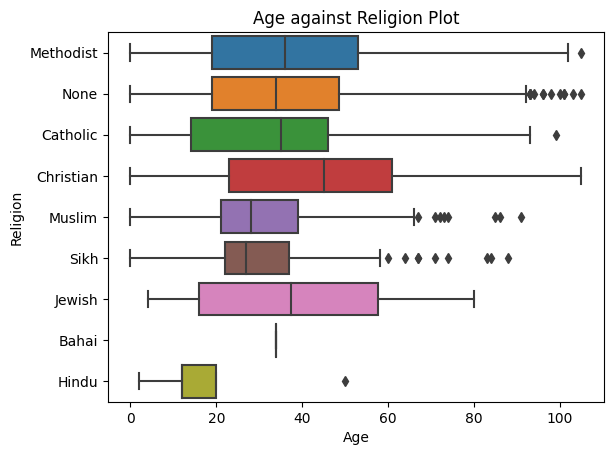

In [165]:
# Age column and Religion Plot
sns.boxplot(data=df,x= "Age" , y="Religion")
plt.title('Age against Religion Plot')

Text(0.5, 1.0, 'Age against Infirmity Plot')

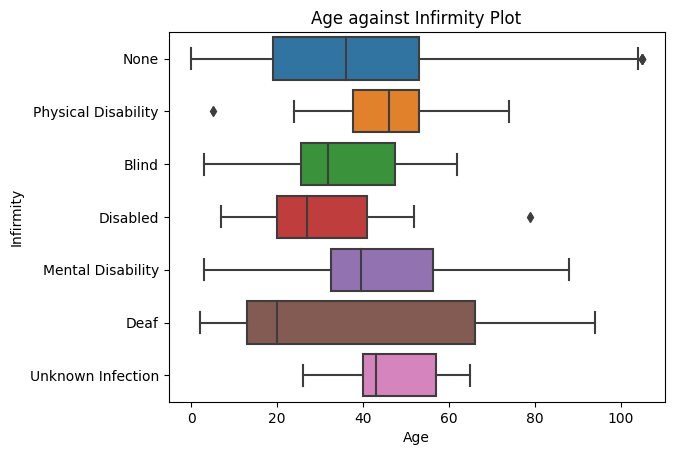

In [166]:
# Age column and Infirmity Plot
sns.boxplot(data=df,x= "Age" , y="Infirmity")
plt.title("Age against Infirmity Plot")

Text(0.5, 1.0, 'Age Box plot against Occupation')

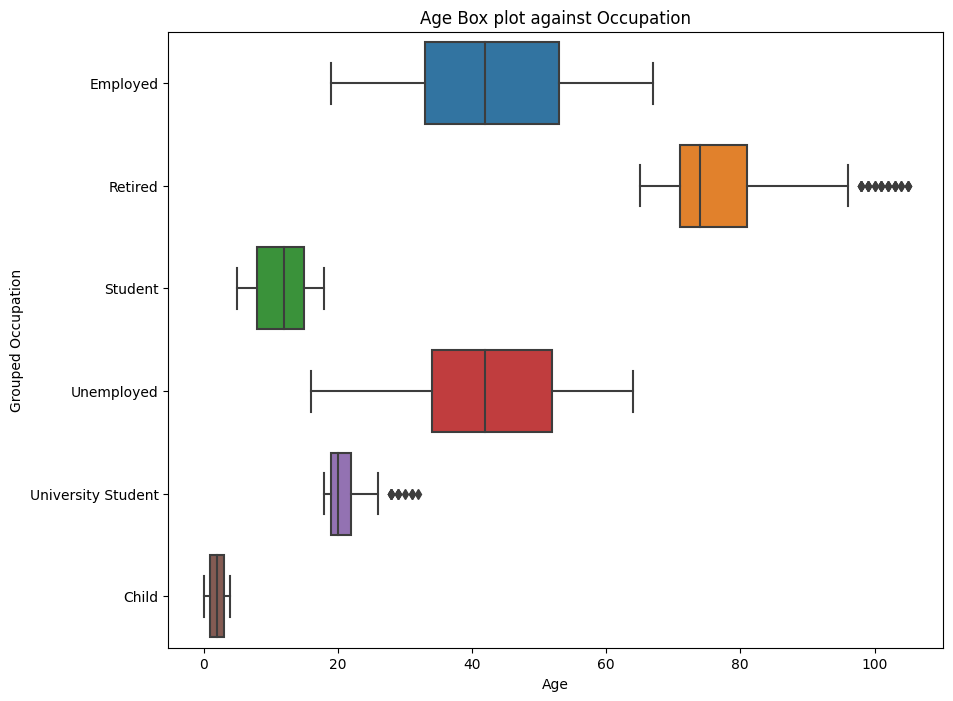

In [167]:
# Age column and Marital Plot

plt.figure(figsize = (10,8))
sns.boxplot(x = df["Age"], y=df['Grouped Occupation'])
plt.title('Age Box plot against Occupation') # Age against Marital Column

Text(0.5, 1.0, 'Relationship to the head of house')

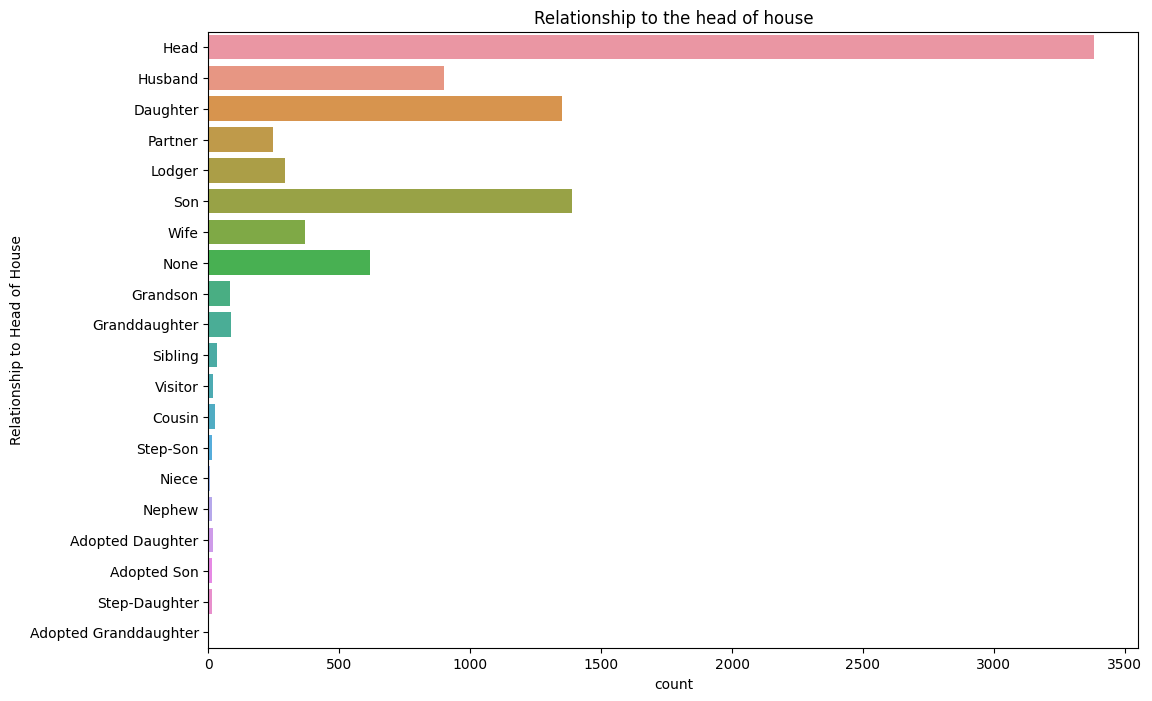

In [168]:
# Relation ship to head of house column Plot

plt.figure(figsize = (12,8))
sns.countplot(y = df["Relationship to Head of House"])
plt.title("Relationship to the head of house")

In [169]:
df["Religion"]

0       Methodist
1       Methodist
2       Methodist
3            None
4            None
          ...    
8869       Muslim
8870       Muslim
8871         None
8872    Methodist
8873    Christian
Name: Religion, Length: 8874, dtype: object

[Text(0.5, 1.0, 'Age Box plot against Marital Status')]

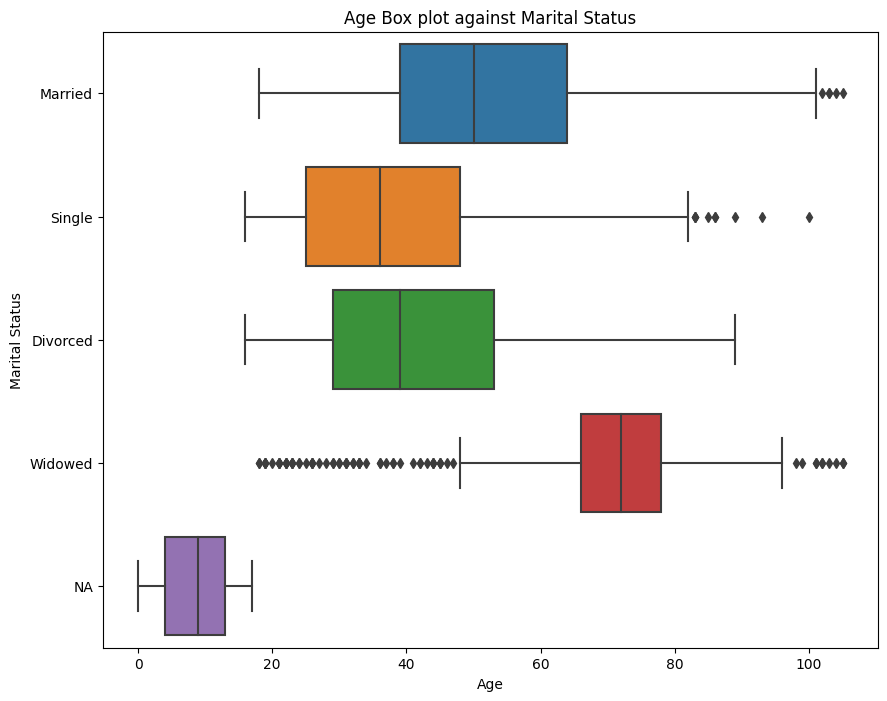

In [170]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df["Age"], y=df["Marital Status"]).set(title = 'Age Box plot against Marital Status') # Age against Marital Column

<Axes: xlabel='Age', ylabel='Relationship to Head of House'>

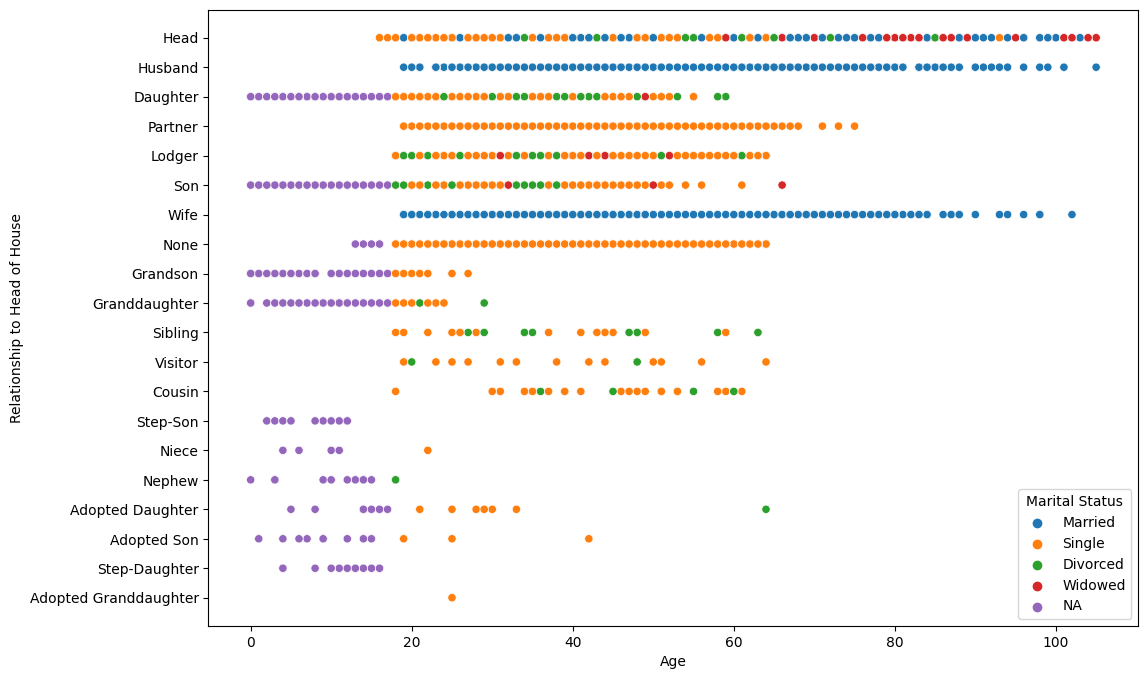

In [171]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df,x= "Age" , y="Relationship to Head of House" , hue = "Marital Status")

[Text(0.5, 1.0, 'Age against Relationship to Head of House')]

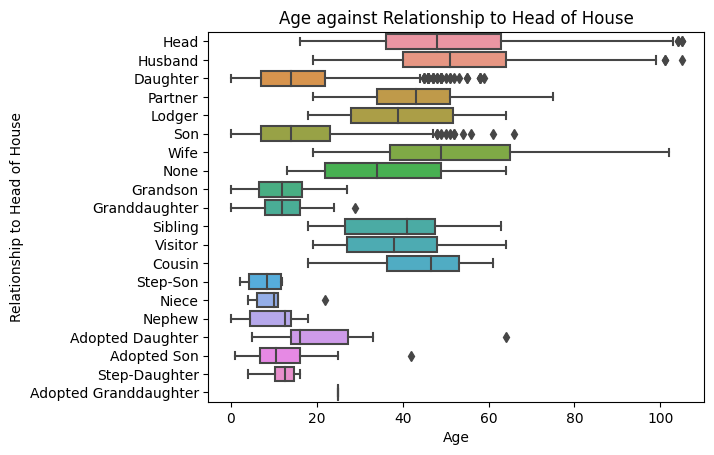

In [172]:
sns.boxplot(data=df,x= "Age" , y="Relationship to Head of House").set(title="Age against Relationship to Head of House")

## Visualisation of Occupation

Text(0.5, 1.0, 'Occupation Plot')

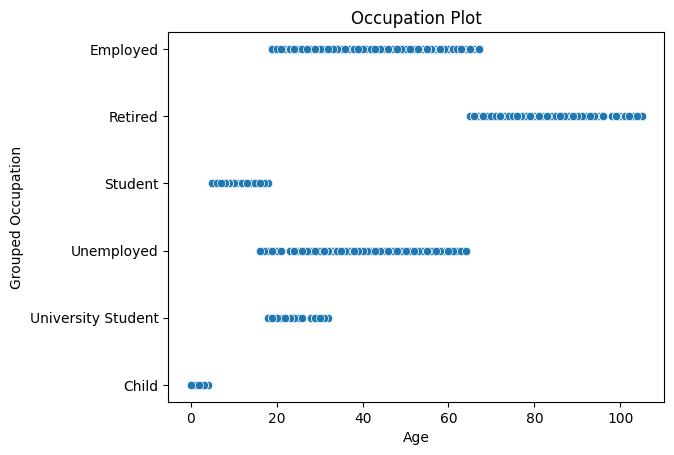

In [173]:
sns.scatterplot(data=df, x= df["Age"] , y="Grouped Occupation")
plt.title("Occupation Plot")

Text(0.5, 1.0, 'Grouped Occupation Plot')

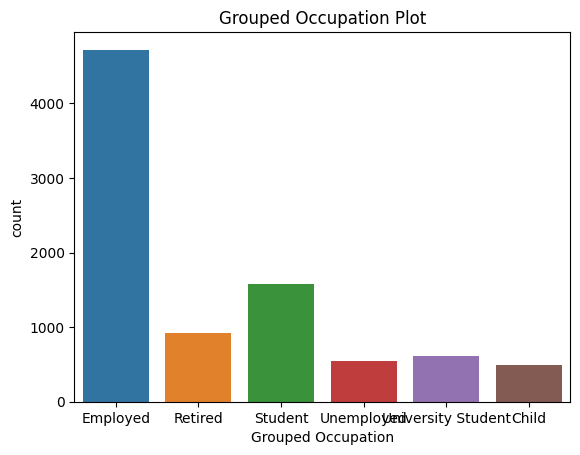

In [174]:
#Grouped Occupation Plot
sns.countplot(x=df["Grouped Occupation"])
plt.title("Grouped Occupation Plot")

Text(0.5, 1.0, 'Grouped Occupation Box plot')

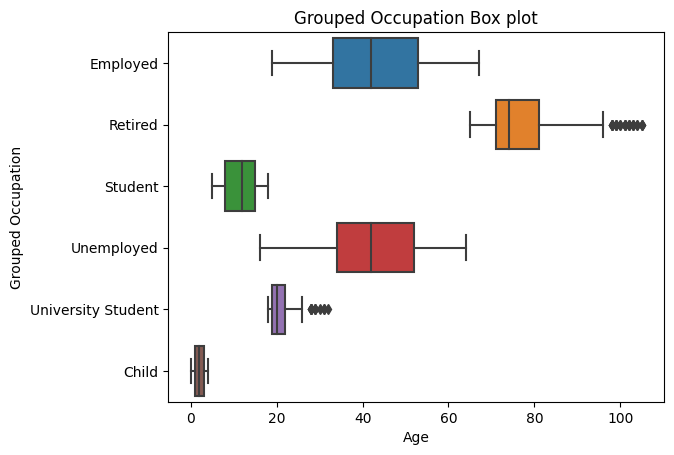

In [175]:
#Grouped Occupation Plot

sns.boxplot(data=df,x= "Age", y="Grouped Occupation")
plt.title("Grouped Occupation Box plot")

Text(0.5, 1.0, 'Age against Religion Plot')

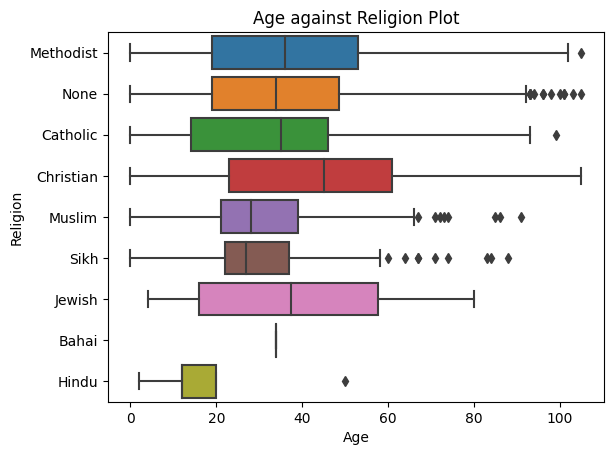

In [176]:
#Age against Religion plot

sns.boxplot(data=df,x= "Age" , y="Religion")
plt.title("Age against Religion Plot")

In [177]:

# Calculate the average age of Christians from the data
average_christian_age = round(df[df['Religion'] == "Christian"]['Age'].mean())

# Count the number of elderly practicing Christians (age 51 and older - adults)
old_practicing_age = df[(df['Religion'] == "Christian") & (df['Age'] >= 51)].shape[0]

# Count the number of youth practicing Christians (ages 16 to 29 -  youth age)
youth_age_practicing = df[(df['Religion'] == "Christian") & (df['Age'] >= 16) & (df['Age'] <= 29)].shape[0]

# Print the results
print('The average Christian age is:', average_christian_age)
print('The number of elderly people that are Christians is:', old_practicing_age)
print('The number of youth that are Christians is:', youth_age_practicing)


The average Christian age is: 43
The number of elderly people that are Christians is: 1099
The number of youth that are Christians is: 400


## This shows the number of growing religion in the population

In [178]:
df['Age Group'].dtype

CategoricalDtype(categories=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                  '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
                  '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
                  '95-99', '100-105'],
, ordered=True)

In [179]:
df['Age Group'].value_counts().sort_index()

0-4        494
5-9        546
10-14      571
15-19      661
20-24      638
25-29      611
30-34      659
35-39      723
40-44      723
45-49      681
50-54      516
55-59      531
60-64      409
65-69      339
70-74      314
75-79      179
80-84      138
85-89       86
90-94       21
95-99       17
100-105     17
Name: Age Group, dtype: int64

In [180]:
df[df['Gender'] == "Male"].value_counts().sum()

4233

In [181]:
df[df['Gender'] == "Female"].value_counts().sum()

4641

## Unemployment Rate

Unemployment Rate=(Total Work Force/Number of Unemployed People )×100

In [182]:

# Count the number of employed individuals
total_employed = df[df["Grouped Occupation"] == 'Employed'].shape[0]

# Count the number of unemployed individuals
total_unemployed = df[df["Grouped Occupation"] == 'Unemployed'].shape[0]

# Count the number of unemployed males
unemployed_male_count = df[(df['Grouped Occupation'] == "Unemployed") & (df['Gender'] == "Male")].shape[0]

# Count the number of unemployed females
unemployed_female_count = df[(df['Grouped Occupation'] == "Unemployed") & (df['Gender'] == "Female")].shape[0]

# Output the counts
print("Total Unemployed:", total_unemployed)
print("Total Employed:", total_employed)
print("Unemployed Males:", unemployed_male_count)
print("Unemployed Females:", unemployed_female_count)

# Calculate the sample population for the employment data
total_work_population = total_employed + total_unemployed
print("Total Working Population:",total_work_population)

# Calculate the percentage of unemployment
percentage_of_unemployment = (total_unemployed / total_work_population) * 100
print("The Unemployment rate is:", round(percentage_of_unemployment, 2),'%')


Total Unemployed: 549
Total Employed: 4718
Unemployed Males: 186
Unemployed Females: 363
Total Working Population: 5267
The Unemployment rate is: 10.42 %


Total Unemployed: 590
Unemployed Males: 205
Unemployed Males Aged 20: 2
Unemployed Females: 385


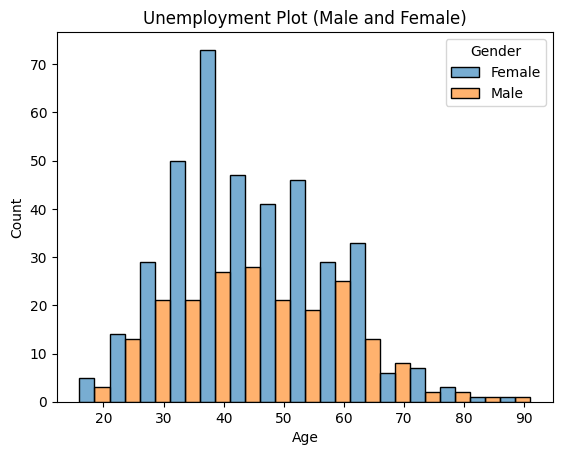

In [183]:
# Using the Occupation column to search for Umemployment rate

# Count the total number of unemployed individuals
unemployed_count = df[df['Occupation'] == "Unemployed"].shape[0]

# Count the number of unemployed males
unemployed_male_count = df[(df['Occupation'] == "Unemployed") & (df['Gender'] == "Male")].shape[0]

# Count the number of unemployed males aged 20
unemployed_male_age_20count = df[(df['Occupation'] == "Unemployed") & (df['Gender'] == "Male") & (df['Age'] == 20)].shape[0]

# Count the number of unemployed females
unemployed_female_count = df[(df['Occupation'] == "Unemployed") & (df['Gender'] == "Female")].shape[0]

# Print the counts
print("Total Unemployed:", unemployed_count)
print("Unemployed Males:", unemployed_male_count)
print("Unemployed Males Aged 20:", unemployed_male_age_20count)
print("Unemployed Females:", unemployed_female_count)

# Plotting the histogram
sns.histplot(data=df[df['Occupation'] == "Unemployed"], x="Age", hue="Gender", binwidth=5, alpha=0.6, multiple='dodge')
plt.title("Unemployment Plot (Male and Female)")
plt.show()



In [184]:
#Occupation grouping sorting

occupation_grouping = df.groupby(['Occupation']).size()

occupation_values =[]
occupation_count = []
for keys,values in enumerate(occupation_grouping):
    occupation_values.append(occupation_grouping.keys()[keys])
    occupation_count.append(occupation_grouping[keys])
    
occupation_df = pd.DataFrame()
occupation_df ['Occupation'] = occupation_values
occupation_df ['Count'] = occupation_count

final_sorting = occupation_df.sort_values (by = ['Count'], ascending = False).head(50)
final_sorting

Occupation  Count
1048                                            Student   1577
1111                                 University Student    591
1110                                         Unemployed    590
101                                               Child    494
432                                         PhD Student     20
1032                                  Software engineer     18
479         Psychologist, prison and probation services     18
42                           Architectural technologist     18
328                                         Interpreter     16
239                 Exhibitions officer, museum/gallery     15
341                                     Learning mentor     15
470                                 Programmer, systems     15
259                               Forensic psychologist     15
260                                  Forensic scientist     14
439                                     Physiotherapist     14
1037                  Special educational needs teacher     14
1053                   Surveyor, commercial/residential     14
168                       Development worker, community     13
366                                 Marketing executive     13
471                                         Proofreader     13
363                      Manufacturing systems engineer     13
485                                Public house manager     13
208                                Engineer, electrical     13
1019            Scientist, research (physical sciences)     13
304                             Housing manager/officer     13
302                                 Hospital pharmacist     13
296                                           Homeopath     13
382                                      Microbiologist     13
446                              Politician's assistant     13
310                               IT sales professional     12
1059                 Surveyor, planning and development     12
209                               Engineer, electronics     12
205                            Engineer, communications     12
329                                  Investment analyst     12
455                                   Probation officer     12
450                              Primary school teacher     12
1011  Scientist, clinical (histocompatibility and im...     12
82                                     Catering manager     12
313                                         Illustrator     12
1030                                  Social researcher     12
16                                Administrator, sports     12
436                                        Photographer     12
434                                Pharmacist, hospital     12
20                          Advertising account planner     12
174                            Doctor, general practice     12
13     Administrator, charities/voluntary organisations     12
248                                Financial controller     12
1070                                     Teacher, music     12
280                  Government social research officer     12
278                                        Geoscientist     11

In [185]:
df['Grouped Occupation'].value_counts().sort_index() # Grouped Occupation

Child                  494
Employed              4718
Retired                925
Student               1577
Unemployed             549
University Student     611
Name: Grouped Occupation, dtype: int64

In [186]:
df['Relationship to Head of House'].value_counts().sort_index()  # Head of house column count

Adopted Daughter           18
Adopted Granddaughter       1
Adopted Son                12
Cousin                     26
Daughter                 1349
Granddaughter              87
Grandson                   83
Head                     3383
Husband                   901
Lodger                    294
Nephew                     14
Niece                       5
None                      619
Partner                   247
Sibling                    31
Son                      1389
Step-Daughter              14
Step-Son                   14
Visitor                    17
Wife                      370
Name: Relationship to Head of House, dtype: int64

In [187]:
#Occupation grouping count

occupancy_grouped = df.groupby(['Grouped Occupation']).size()
occupancyg_df = occupancy_grouped.reset_index(name='Count')

occupancyg_df



Grouped Occupation  Count
0               Child    494
1            Employed   4718
2             Retired    925
3             Student   1577
4          Unemployed    549
5  University Student    611

In [188]:
# Relationship to Head of house column count

hoh_grouped = df.groupby(['Relationship to Head of House']).size()
hoh_df = hoh_grouped.reset_index(name='Count')

hoh_df

Relationship to Head of House  Count
0               Adopted Daughter     18
1          Adopted Granddaughter      1
2                    Adopted Son     12
3                         Cousin     26
4                       Daughter   1349
5                  Granddaughter     87
6                       Grandson     83
7                           Head   3383
8                        Husband    901
9                         Lodger    294
10                        Nephew     14
11                         Niece      5
12                          None    619
13                       Partner    247
14                       Sibling     31
15                           Son   1389
16                 Step-Daughter     14
17                      Step-Son     14
18                       Visitor     17
19                          Wife    370

## Dependency Ratio Calculation

In [189]:
#By using the early working age and retirement age we can get the working population

# Count the number of children (age <= 15)
children = df[df['Age'] <= 15].shape[0]

# Count the number of retirement age (age >= 66)
elderly_retired = df[df['Grouped Occupation'] == 'Retired'].shape[0]
##elderly = df[df['Age'] >= 66].shape[0]

# Count the number of working-age population (age between 15 and 66)
working_population = df[(df['Age'] >= 16) & (df['Age'] <= 66)].shape[0]

# Print the counts
print('The children count is:', children)
print('Elderly people count is:', elderly_retired)
print('Working-age group count is:', working_population)

# Calculate the dependent population (children + elderly)
dependent = children + elderly_retired

# Calculate the dependency ratio
dependency_ratio = (dependent / working_population) * 100

# Print the dependency ratio
print('The dependency ratio is:', dependency_ratio)


The children count is: 1741
Elderly people count is: 925
Working-age group count is: 6149
The dependency ratio is: 43.35664335664335


Source:UK  Child working Age https://childlawadvice.org.uk/information-pages/child-employment/#:~:text=Young%20people%20can%20start%20full,they%20turn%2016%20years%20old.

Adult retirement age: https://www.ageuk.org.uk/cymru/information-advice/money-legal/pensions/state-pension/#:~:text=phased%20out%20completely.-,When%20will%20I%20reach%20State%20Pension%20age%3F,the%20government%27s%20State%20Pension%20calculator.


## Calculation of Commuters Percentage

In [190]:
# Calculate the total number of entries
total = df.shape[0]

# Count the number of visitors
visitors = df[df['Relationship to Head of House'] == "Visitor"].shape[0]

# Count the number of lodgers
lodger = df[df['Relationship to Head of House'] == "Lodger"].shape[0]

# Count the number of university students
university_student = df[df['Grouped Occupation'].str.contains('Student', na=False)].shape[0]

# Calculate the total number of commuters
total_commuters = visitors + lodger + university_student

# Calculate the percentage of commuters
commuters_percentage = (total_commuters / total) * 100

# Print the commuters percentage
print("Commuters percentage is:", round(commuters_percentage, 2), '%')


# Sum the counts to get the total number of visitors, lodgers, and university students
commuters_number = visitors + lodger + university_student

print("Total number of visitors, lodgers, and university students:", commuters_number)


Commuters percentage is: 28.16 %
Total number of visitors, lodgers, and university students: 2499


In [191]:
df['Marital Status'].value_counts() #count


Single      3093
Married     2551
NA          1967
Divorced     861
Widowed      402
Name: Marital Status, dtype: int64

In [192]:
# 1. Age Distribution: To assess population expansion and age-specific needs
age_distribution = df['Age'].value_counts().sort_index()
age_distribution

0       84
1       97
2      102
3      107
4      104
      ... 
101      4
102      3
103      3
104      2
105      3
Name: Age, Length: 105, dtype: int64

In [193]:
# 2. Identifying Commuters: Looking for occupations that suggest commuting, especially students
commuter_count = df['Occupation'].str.contains('Student').sum()
commuter_count

2188

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8874 entries, 0 to 8873
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8874 non-null   int64   
 1   Street                         8874 non-null   object  
 2   First Name                     8874 non-null   object  
 3   Surname                        8874 non-null   object  
 4   Age                            8874 non-null   int64   
 5   Relationship to Head of House  8874 non-null   object  
 6   Marital Status                 8874 non-null   object  
 7   Gender                         8874 non-null   object  
 8   Occupation                     8874 non-null   object  
 9   Infirmity                      8874 non-null   object  
 10  Religion                       8874 non-null   object  
 11  Grouped Occupation             8874 non-null   object  
 12  Age Group                      887

In [195]:
df.isna().sum()


House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Grouped Occupation               0
Age Group                        0
dtype: int64

In [196]:
df.describe()

House Number          Age
count   8874.000000  8874.000000
mean      40.416836    37.105477
std       46.152855    21.963365
min        1.000000     0.000000
25%       10.000000    19.000000
50%       23.000000    36.000000
75%       49.000000    53.000000
max      236.000000   105.000000

In [197]:
# This shows the Profile report used in the report of the population census

from pandas_profiling import ProfileReport
#Profile reports

ProfileReport(df)

C:\Program Files\Python311\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Program Files\Python311\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
C:\Users\690303\AppData\Local\Temp\ipykernel_15768\2256188319.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `impor

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Recommendations

Based on the insights gotten from the census data, and justifications made, from the growing population, High-density housing based on occupancy levels and the age pyramid structure shows a growing population with a large number of youths and young adults, therefore high-density housing can provide affordable living space for individuals starting a family or students. Also, with 28.16% of commuters and a high employment rate of 53.2%, the government can improve the transportation of these individuals by investing in building a train station which would help reduce the road transport pressure. Though the population seems healthy with a low infirmity rate, provision for emergency medical buildings/ clinics in case of future emergencies like childbirth or maternity/ normal injuries/ accidents cases would be handled properly.

Given that the population has about 11.12% unemployment rate, especially among females between 30 and 60, the government should invest in skill training programs to help reduce the unemployment rate to empower a portion of the growing population. The presence of a young population and the potential for an increasing number of school-aged children warrant an increase in educational spending to build and expand schools and educational facilities. For future development, old age care facilities should also be looked into ahead though this is not an immediate need. As the population grows there will be a need for a general infrastructure service within the town to ensure proper maintenance. However, this is also not an immediate need. These strategic investments are anticipated to pave the way for a well-rounded community development that aligns with both current demands and future growth projections.
